# Kaggle - HR Dataset (Multinational Company)

This dataset contains HR information for employees of a multinational corporation (MNC). It includes 2 Million (20 Lakhs) employee records with details about personal identifiers, job-related attributes, performance, employment status, and salary information. The dataset can be used for HR analytics, including workforce distribution, attrition analysis, salary trends, and performance evaluation.

# Assigned Task
  -

Dataset (CSV): https://github.com/frdz-salman/Video-Game-Sales/tree/main/dataset

# Objectives

-

# **A. Data Preparation**

## Import Library

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings('ignore')

pd.set_option('float_format','{:.2f}'.format)

pd.set_option('display.max_columns',None)

## Reuseable Function

### Commas

In [2]:
def commas(x):
    if pd.isna(x):
        return x
    elif isinstance(x, float):
        return f"{x:,.2f}"
    elif isinstance(x, int):
        return f"{x:,}"
    else:
        return x

def format_commas(x, pos):
    if abs(x) >= 1_000_000_000:
        return f'{x / 1_000_000_000:.1f}B'
    elif abs(x) >= 1_000_000:
        return f'{x / 1_000_000:.1f}M'
    elif abs(x) >= 1_000:
        return f'{x / 1_000:.1f}K'
    else:
        return f'{x:.0f}'

def format_yaxis_comma(ax=None):
    if ax is None:
        ax = plt.gca()
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_commas))

def format_xaxis_comma(ax=None):
    if ax is None:
        ax = plt.gca()
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_commas))

def add_bar_labels(x, y, ax=None, rotation=0, fontsize=11):
    if ax is None:
        ax = plt.gca()
    for i, value in enumerate(y):
        ax.text(x[i], value, f'{value:,.0f}', ha='center', va='bottom',
                fontsize=fontsize, rotation=rotation,bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8, edgecolor='none'))

### Chart

In [3]:
def add_barh_labels(x, y, ax=None, fontsize=9):
    if ax is None:
        ax = plt.gca()
    for i, value in enumerate(y):
        ax.text(value, i, f'{value:,.0f}', va='center', ha='left',
                fontsize=fontsize, bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8, edgecolor='none'))

def add_line_labels(x, y, ax=None, offset=10, fontsize=8):
    if ax is None:
        ax = plt.gca()
    for i, value in enumerate(y):
        if not pd.isna(value):
            ax.annotate(f'{value:,.0f}', (x[i], value),
                    textcoords="offset points", xytext=(0, offset),
                    ha='center', fontsize=fontsize,bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.9, edgecolor='gray'))

def get_conditional_colors(values, first_color, up_color, down_color):
    colors = []
    for i, value in enumerate(values):
        if i == 0:
            colors.append(first_color)
        else:
            if value > values[i - 1]:
                colors.append(up_color)
            else:
                colors.append(down_color)
    return colors

In [4]:
def bar_chart(x, y, title, xlabel='', ylabel='', color='darkgray', rotation=0, palette=None):
    plt.figure(figsize=(12, 6))
    if palette:
        colors = sns.color_palette(palette, len(y))
    else:
        colors = color
    plt.bar(x, y, color=colors)
    add_bar_labels(x, y, rotation=rotation)
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True, alpha=0.3)
    format_yaxis_comma()
    plt.xticks(rotation=rotation)
    plt.tight_layout()
    plt.show()

def barh_chart(x, y, title, xlabel='', ylabel='', color='darkgray', palette=None):
    plt.figure(figsize=(12, 6))
    if palette:
        colors = sns.color_palette(palette, len(y))
    else:
        colors = color
    plt.barh(x, y, color=colors)
    add_barh_labels(x, y)
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True, axis='x', alpha=0.3)
    format_xaxis_comma()
    plt.tight_layout()
    plt.show()

def conditional_bar(x, y, title, xlabel='', ylabel='',
                        first_color='darkgray', up_color='green', down_color='red',
                        ax=None):
    colors = get_conditional_colors(y, first_color, up_color, down_color)
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(x, y, color=colors)
    add_bar_labels(x, y, ax=ax)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    format_yaxis_comma(ax=ax)
    ax.grid(True, axis='y', alpha=0.3)
    plt.tight_layout()


def line_chart(x, y, title, xlabel='', ylabel='', first_color='darkgray',
                    up_color='green', down_color='red', line_color='darkgray'):
    plt.figure(figsize=(12, 6))
    plt.plot(x, y, color=line_color, linewidth=2, alpha=0.7)
    colors = get_conditional_colors(y, first_color, up_color, down_color)

    for xi, yi, c in zip(x, y, colors):
        plt.plot(xi, yi, marker='o', color=c, markersize=8)

    add_line_labels(x, y)
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True, alpha=0.3)
    format_yaxis_comma()
    plt.tight_layout()

def scatter_plot(x, y, title, xlabel='', ylabel='', hue=None, size=None, style=None, palette='viridis'):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=x, y=y, hue=hue, size=size, style=style, alpha=0.6, s=50, palette=palette)
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(True, alpha=0.3)
    format_yaxis_comma()
    format_xaxis_comma()
    plt.tight_layout()
    plt.show()

def pie_chart_custom(values, labels, title='', palette='Set2', figsize=(8,8), ax=None):
    colors = sns.color_palette(palette, len(values))

    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)

    def make_autopct(values):
        def my_autopct(pct):
            total = sum(values)
            val = int(round(pct * total / 100.0))
            return f'{pct:.1f}%\n({val:,})'
        return my_autopct

    wedges, texts, autotexts = ax.pie(
        values, labels=labels,
        autopct=make_autopct(values),
        startangle=90, colors=colors,
        wedgeprops=dict(edgecolor='white', linewidth=2)
    )
    ax.set_title(title, fontsize=14, pad=20)
    ax.axis('equal')
    if ax is None:
        plt.show()

## Import Dataset

In [8]:
import gdown
import pandas as pd

# ambil file_id dari link
file_id = "1Msr9DVw1c58rvKNl9PiLh2iA3f8P2wmb"
url = f"https://drive.google.com/uc?id={file_id}"

output = "sales.csv"
gdown.download(url, output, quiet=False)

sales_df = pd.read_csv(output)
sales_df.head()

Downloading...
From (original): https://drive.google.com/uc?id=1Msr9DVw1c58rvKNl9PiLh2iA3f8P2wmb
From (redirected): https://drive.google.com/uc?id=1Msr9DVw1c58rvKNl9PiLh2iA3f8P2wmb&confirm=t&uuid=4cbf75d3-370d-424a-a988-a1214e75d7f9
To: d:\Documents\VScode\Data Analyst\Data Analyst\Proyek Real\Maven - Video Game Sales\exploration\sales.csv
100%|██████████| 245M/245M [00:23<00:00, 10.5MB/s] 


,Unnamed: 0,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
0,0,EMP0000001,Joshua Nguyen,IT,Software Engineer,2011-08-10,"Isaacland, Denmark",5,14,Resigned,On-site,1585363
1,1,EMP0000002,Julie Williams,Marketing,SEO Specialist,2018-03-02,"Anthonyside, Costa Rica",2,7,Active,On-site,847686
2,2,EMP0000003,Alyssa Martinez,HR,HR Manager,2023-03-20,"Port Christinaport, Saudi Arabia",1,2,Active,On-site,1430084
3,3,EMP0000004,Nicholas Valdez,IT,Software Engineer,2023-10-12,"Port Shelbychester, Antigua and Barbuda",1,1,Active,On-site,990689
4,4,EMP0000005,Joel Hendricks,Operations,Logistics Coordinator,2024-12-09,"Lake Kimberly, Palestinian Territory",5,0,Active,On-site,535082


In [14]:
sales_df.sample(10)

,unnamed_0,employee_id,full_name,department,job_title,hire_date,location,performance_rating,experience_years,status,work_mode,salary_inr
652138,652138,EMP0652139,Holly Oliver,IT,Software Engineer,2025-06-17,"Lake Carrie, Egypt",5,0,Active,On-site,1136729
265717,265717,EMP0265718,Cynthia Hall,Operations,Logistics Coordinator,2025-03-25,"Paulview, Lithuania",5,0,Active,On-site,422099
1172375,1172375,EMP1172376,Amanda Mora,IT,Software Engineer,2019-05-18,"New Robin, Czech Republic",2,6,Active,On-site,799645
1192992,1192992,EMP1192993,Anne Brown,IT,Software Engineer,2020-08-28,"North Anthonyshire, Micronesia",3,4,Active,Remote,1563002
1447096,1447096,EMP1447097,Savannah Warner,R&D,Product Developer,2017-04-06,"North Markview, Ecuador",4,8,Active,On-site,1124010
515463,515463,EMP0515464,Donna Hess,Operations,Operations Executive,2020-11-02,"Holdenton, Turks and Caicos Islands",3,4,Resigned,On-site,481212
836142,836142,EMP0836143,Dawn Wilkins,Sales,Sales Executive,2022-10-18,"Perezland, Cape Verde",4,2,Active,On-site,764914
548142,548142,EMP0548143,Samantha White,IT,Software Engineer,2021-08-25,"New Sherry, Lebanon",2,3,Resigned,On-site,1359309
750461,750461,EMP0750462,Lisa Williams,R&D,Lab Technician,2015-09-02,"Lake Joshuashire, Singapore",2,9,Resigned,On-site,1073688
680180,680180,EMP0680181,Jennifer Dunn,IT,DevOps Engineer,2024-11-07,"Port Miguelberg, Cocos (Keeling) Islands",1,0,Active,On-site,637092


# **B. Data Cleaning**

## Rename Columns

In [13]:
def clean_column_names(df):
    original_cols = df.columns.tolist()
    df.columns = df.columns.str.strip()
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(' ', '_')
    df.columns = df.columns.str.replace('[^a-zA-Z0-9_]', '', regex=True)

    changes = []
    for old, new in zip(original_cols, df.columns):
        if old != new:
            changes.append(f"'{old}' -> '{new}'")
    if changes:
        print("📝 Column name changes:")
        for change in changes:
            print(f"   {change}")
    else:
        print("✅ No column name changes needed")
    return df

clean_column_names(sales_df).head(1)

📝 Column name changes:
   'Unnamed: 0' -> 'unnamed_0'
   'Employee_ID' -> 'employee_id'
   'Full_Name' -> 'full_name'
   'Department' -> 'department'
   'Job_Title' -> 'job_title'
   'Hire_Date' -> 'hire_date'
   'Location' -> 'location'
   'Performance_Rating' -> 'performance_rating'
   'Experience_Years' -> 'experience_years'
   'Status' -> 'status'
   'Work_Mode' -> 'work_mode'
   'Salary_INR' -> 'salary_inr'


,unnamed_0,employee_id,full_name,department,job_title,hire_date,location,performance_rating,experience_years,status,work_mode,salary_inr
0,0,EMP0000001,Joshua Nguyen,IT,Software Engineer,2011-08-10,"Isaacland, Denmark",5,14,Resigned,On-site,1585363


## Detecting Duplicated Data

In [12]:
print(f"sales: {sales_df.duplicated().sum()}")

sales: 0


## Detecting Null Data

In [ ]:
sales.isna().sum()

Unnamed: 0            0
Employee_ID           0
Full_Name             0
Department            0
Job_Title             0
Hire_Date             0
Location              0
Performance_Rating    0
Experience_Years      0
Status                0
Work_Mode             0
Salary_INR            0
dtype: int64

In [ ]:
sales

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.40,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.70,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.60,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.10,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64011,/games/boxart/full_2779838AmericaFrontccc.jpg,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-11,2019-01-28
64012,/games/boxart/full_8031506AmericaFrontccc.jpg,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64013,/games/boxart/full_6553045AmericaFrontccc.jpg,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64014,/games/boxart/full_6012940JapanFrontccc.png,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-28,2019-02-24


In [ ]:
sales[sales['delivery_date'].isna()].head(5)

,order_number,line_item,order_date,delivery_date,customerkey,storekey,productkey,quantity,currency_code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
6,366004,1,1/1/2016,NaN,1107461,38,163,6,GBP
7,366004,2,1/1/2016,NaN,1107461,38,1529,2,GBP
8,366005,1,1/1/2016,NaN,844003,33,421,4,EUR
9,366007,1,1/1/2016,NaN,2035771,43,1617,1,USD


In [ ]:
customer.isna().sum()

customerkey     0
gender          0
name            0
city            0
state_code     10
state           0
zip_code        0
country         0
continent       0
birthday        0
dtype: int64

In [ ]:
customer[customer['state_code'].isna()].head(5)

,customerkey,gender,name,city,state_code,state,zip_code,country,continent,birthday
5304,729681,Female,Rossana Padovesi,Polvica,NaN,Napoli,80035,Italy,Europe,4/18/1981
5316,732289,Male,Indro Piccio,Varcaturo,NaN,Napoli,80014,Italy,Europe,2/24/1949
5372,742042,Male,Amaranto Loggia,Casaferro,NaN,Napoli,80034,Italy,Europe,3/14/1936
5377,742886,Female,Edmonda Capon,Terzigno,NaN,Napoli,80040,Italy,Europe,8/6/1963
5378,743343,Female,Ambra Sagese,Pomigliano D'Arco,NaN,Napoli,80038,Italy,Europe,1/5/1961


In [ ]:
products.isna().sum()

productkey        0
product_name      0
brand             0
color             0
unit_cost_usd     0
unit_price_usd    0
subcategorykey    0
subcategory       0
categorykey       0
category          0
dtype: int64

In [ ]:
exchange.isna().sum()

date        0
currency    0
exchange    0
dtype: int64

In [ ]:
stores.isna().sum()

storekey         0
country          0
state            0
square_meters    1
open_date        0
dtype: int64

In [ ]:
stores[stores['square_meters'].isna()]

,storekey,country,state,square_meters,open_date
66,0,Online,Online,NaN,1/1/2010


## Converting Data Types

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_number   62884 non-null  int64 
 1   line_item      62884 non-null  int64 
 2   order_date     62884 non-null  object
 3   delivery_date  13165 non-null  object
 4   customerkey    62884 non-null  int64 
 5   storekey       62884 non-null  int64 
 6   productkey     62884 non-null  int64 
 7   quantity       62884 non-null  int64 
 8   currency_code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


In [ ]:
sales[['delivery_date', 'order_date']] = sales[['delivery_date', 'order_date']].apply(pd.to_datetime)

In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   productkey      2517 non-null   int64 
 1   product_name    2517 non-null   object
 2   brand           2517 non-null   object
 3   color           2517 non-null   object
 4   unit_cost_usd   2517 non-null   object
 5   unit_price_usd  2517 non-null   object
 6   subcategorykey  2517 non-null   int64 
 7   subcategory     2517 non-null   object
 8   categorykey     2517 non-null   int64 
 9   category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


In [ ]:
products['unit_cost_usd'] = products['unit_cost_usd'].str.replace('$', '', regex=False).str.replace(',', '').str.strip()
products['unit_price_usd'] = products['unit_price_usd'].str.replace('$', '', regex=False).str.replace(',', '').str.strip()

In [ ]:
products[['unit_cost_usd', 'unit_price_usd']] = products[['unit_cost_usd', 'unit_price_usd']].astype('float64')

In [ ]:
exchange.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      11215 non-null  object 
 1   currency  11215 non-null  object 
 2   exchange  11215 non-null  float64
dtypes: float64(1), object(2)
memory usage: 263.0+ KB


In [ ]:
exchange['date'] = pd.to_datetime(exchange['date'], errors='coerce')

In [ ]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   storekey       67 non-null     int64  
 1   country        67 non-null     object 
 2   state          67 non-null     object 
 3   square_meters  66 non-null     float64
 4   open_date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


In [ ]:
stores['open_date'] = pd.to_datetime(stores['open_date'], errors='coerce')

In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customerkey  15266 non-null  int64 
 1   gender       15266 non-null  object
 2   name         15266 non-null  object
 3   city         15266 non-null  object
 4   state_code   15256 non-null  object
 5   state        15266 non-null  object
 6   zip_code     15266 non-null  object
 7   country      15266 non-null  object
 8   continent    15266 non-null  object
 9   birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
customer['birthday'] = pd.to_datetime(customer['birthday'], errors='coerce')

## Checking Values & Typos

In [ ]:
products['category'].unique()

array(['Audio', 'TV and Video', 'Computers', 'Cameras and camcorders',
       'Cell phones', 'Music, Movies and Audio Books', 'Games and Toys',
       'Home Appliances'], dtype=object)

In [ ]:
products['subcategory'].unique()

array(['MP4&MP3', 'Recording Pen', 'Bluetooth Headphones', 'Televisions',
       'VCD & DVD', 'Home Theater System', 'Car Video', 'Laptops',
       'Desktops', 'Monitors', 'Projectors & Screens',
       'Printers, Scanners & Fax', 'Computers Accessories',
       'Digital Cameras', 'Digital SLR Cameras', 'Camcorders',
       'Cameras & Camcorders Accessories', 'Home & Office Phones',
       'Touch Screen Phones', 'Smart phones & PDAs', 'Movie DVD',
       'Boxed Games', 'Download Games', 'Washers & Dryers',
       'Refrigerators', 'Microwaves', 'Water Heaters', 'Coffee Machines',
       'Lamps', 'Air Conditioners', 'Fans', 'Cell phones Accessories'],
      dtype=object)

In [ ]:
customer['customerkey'].value_counts()

customerkey
301        1
325        1
554        1
786        1
1042       1
          ..
2099600    1
2099618    1
2099758    1
2099862    1
2099937    1
Name: count, Length: 15266, dtype: int64

In [ ]:
customer['city'].unique()

array(['WANDEARAH EAST', 'MOUNT BUDD', 'WINJALLOK', ..., 'Felton',
       'Pump Station Three', 'Lorton'], shape=(8258,), dtype=object)

In [ ]:
stores[stores['square_meters'].isna()]

,storekey,country,state,square_meters,open_date
66,0,Online,Online,NaN,2010-01-01


### Customer Values Group

In [ ]:
(customer['state'] == customer['state_code']).value_counts()

False    13322
True      1944
Name: count, dtype: int64

In [ ]:
customer[customer['country'] == 'United Kingdom'].sample(10)

,customerkey,gender,name,city,state_code,state,zip_code,country,continent,birthday
8226,1165228,Female,Isabel Gibbons,Willoughby,Lincoln,Lincoln,LN13 4ZU,United Kingdom,Europe,1982-07-22
8165,1156456,Male,James Fitzgerald,WRANGLE,Boston,Boston,PE22 2BB,United Kingdom,Europe,1983-04-15
8285,1173991,Female,Millie Saunders,TWYFORD,Norfolk,Norfolk,NR20 3QY,United Kingdom,Europe,1960-02-01
6792,945870,Male,Max Glover,TERRINGTON,York,York,YO6 8NL,United Kingdom,Europe,1957-06-04
8359,1188010,Male,Luke Pearson,OFFTON,Babergh,Babergh,IP8 4UL,United Kingdom,Europe,1947-11-05
7903,1118689,Male,Jamie Hilton,CALLOW END,Worcester,Worcester,WR2 7RB,United Kingdom,Europe,1969-03-11
8354,1187490,Male,Jacob Wallace,MARSTON ST LAWRENCE,Cherwell,Cherwell,OX17 2UF,United Kingdom,Europe,1993-12-21
6770,941899,Female,Lily Norton,BADLUARCHRACH,Highland,Highland,IV23 3BL,United Kingdom,Europe,1971-04-07
6899,962533,Female,Alicia Gregory,RUSHMERE,Suffolk,Suffolk,NR33 9UH,United Kingdom,Europe,1984-09-17
8112,1147157,Male,Harley Parkes,WYCK RISSINGTON,Tewkesbury,Tewkesbury,GL54 3BE,United Kingdom,Europe,1978-07-16


>**Issues**:
  1. The columns State and Country appear in both the stores and customer tables. To avoid confusion during merging, the columns were renamed appropriately.
  2. There are missing values in some columns, but they can be replaced with the mean value for further analysis.
  3. Some entries in the Customer city column are not properly capitalized, causing inconsistency in location data. Standardization is needed.
  4. Several names contain inconsistencies or typos, e.g., 'MP4&MP3', 'Cameras and camcorders', 'Cell phones', 'Smart phones & PDAs'.
  5. Online store records currently lack geographical location data both store_country and store_state are listed simply as "Online", and square_meters is marked as 0. This creates limitations in location-based analysis (e.g., revenue by country or store_size distribution).

>**Insights**:
  - The state_code field in UK data contains full state names, e.g., "Chichester" instead of standard abbreviations


***

## Replacing Value

In response to issues (1) - (4) we should rename the overlapping columns before merging, impute missing values, and standardize or correct typos in category and subcategory names for consistency.

In [ ]:
stores.rename(columns={
    'state': 'store_state',
    'country': 'store_country'
}, inplace=True)

customer.rename(columns={
    'state': 'customer_state',
    'country': 'customer_country',
    'city' : 'customer_city'
}, inplace=True)

In [ ]:
customer.loc[customer['customer_state'] == 'Napoli', 'state_code'] = 'NA'

In [ ]:
customer['customer_city'] = customer['customer_city'].str.title()

In [ ]:
products['subcategory'] = products['subcategory'].replace({
    'MP4&MP3': 'MP4 & MP3',
    'Smart phones': 'Smartphones',
    'Cell phones Accessories': 'Cell Phones Accessories'
})

products['category'] = products['category'].replace({
    'Cameras and camcorders': 'Cameras and Camcorders',
    'Cell phones': 'Cell Phones',
})

In [ ]:
brand_abbrev = {
    'Wide World Importers': 'WWI',
    'Southridge Video': 'SV',
    'Tailspin Toys': 'MGS',
    'Northwind Traders': 'NT',
    'Fabrikam': 'Fabrikam',
    'A. Datum': 'A. Datum',
    'The Phone Company': 'The Phone Company',
    'Proseware': 'Proseware',
    'Litware': 'Litware',
    'Contoso': 'Contoso',
    'Adventure Works': 'Adventure Works'
}

def remove_abbreviation(row):
    abbrev = brand_abbrev.get(row['brand'], None)
    name = row['product_name']

    if abbrev and name.startswith(abbrev):
        return name[len(abbrev):].strip()
    return name

products['product_name'] = products.apply(remove_abbreviation, axis=1)

> Issue (1) - (4) has been fully solved.
---


## Manipulating Dataset

### Store Size

In [ ]:
def store_size(sq):
    if  pd.isna(sq): return 'Online Store'
    elif sq < 500: return 'Small'
    elif sq < 1500: return 'Medium'
    else: return 'Large'
stores['store_size'] = stores['square_meters'].apply(store_size)
stores['store_type'] = stores['store_country'].apply(lambda x: 'Online' if x == 'Online' else 'Instore')

In [ ]:
# stores.to_csv(r"D:\Documents\VScode\Data Analyst\Data Analyst\Proyek Real\Maven - Global Electronics Retailer\dataset\stores_add_size.csv", index=False)

### Join

In [ ]:
clean = (sales
    .merge(customer, on="customerkey", how="left")
    .merge(products, on="productkey", how="left")
    .merge(stores, on="storekey", how="left")
    .merge(exchange,
        left_on=["order_date", "currency_code"],
        right_on=["date", "currency"],
        how="left")
)

### Dropping Columns

In [ ]:
clean.drop(columns=['productkey', 'currency_code', 'subcategorykey', 'categorykey', 'date'], inplace=True)


### Feature Engineering

In [ ]:
# Time extraction
clean["year"] = clean["order_date"].dt.year
clean["month"] = clean["order_date"].dt.to_period("M")
clean["month_number"] = clean["order_date"].dt.month

# clean['month_name'] = clean['month_name'].astype(month_order)
clean["quarter"] = clean["order_date"].dt.quarter
clean['day_name'] = clean['order_date'].dt.day_name()
clean['day_type'] = clean['order_date'].dt.dayofweek.map(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Revenue and profit calculations
clean['revenue_usd'] = clean['unit_price_usd'] * clean['quantity']
clean['revenue_local'] = (clean['unit_price_usd'] * clean['quantity']) * clean['exchange']
clean['revenue_local_currency'] = clean['revenue_local'].round(2).astype(str) + ' ' + clean['currency']
clean['profit_usd'] = (clean['unit_price_usd'] - clean['unit_cost_usd']) * clean['quantity']
clean['profit_local'] = (clean['unit_price_usd'] - clean['unit_cost_usd']) * clean['quantity'] * clean['exchange']
clean['profit_local_currency'] = clean['profit_local'].round(2).astype(str) + ' ' + clean['currency']

clean['delivery_time'] = (clean['delivery_date'] - clean['order_date']).dt.days

last_transaction = datetime(2021, 2, 28)
clean['age'] = clean['birthday'].apply(lambda x: last_transaction.year - x.year - ((last_transaction.month, last_transaction.day) < (x.month, x.day)))


### More Clean

>**Issues**:
  5. Online store records currently lack geographical location data both store_country and store_state are listed simply as "Online", and square_meters is marked as Null. This creates limitations in location-based analysis (e.g., revenue by country or store_size distribution).

Recommendation:

In response to issues (5) to enhance the accuracy of location-based analysis, update records where the store is labeled as "Online" by assigning the store_country and store_state to match the respective customer's location. This reflects real-world purchasing behavior, where customers typically buy within their own region. Keep square_meters as NaN to indicate that these are virtual stores.

In [ ]:
online_mark = (clean['store_country'] == 'Online') & (clean['store_state'] == 'Online')
clean.loc[online_mark, 'store_country'] = clean.loc[online_mark, 'customer_country']
clean.loc[online_mark, 'store_state'] = clean.loc[online_mark, 'customer_state']

> Issue (5) has been fully solved. The dataset confirmed clean
---

### Replacing Columns

In [ ]:
clean = clean.rename(columns={'customerkey': 'customer_id'})

In [ ]:
clean = clean[
    ['name', 'customer_id', 'gender', 'birthday', 'age','continent', 'customer_country', 'customer_state','state_code', 'customer_city', 'zip_code', 'order_number', 'line_item', 'order_date', 'delivery_date', 'delivery_time', 'year', 'month', 'month_number', 'quarter', 'day_name', 'day_type','quantity', 'product_name', 'brand', 'color', 'category', 'subcategory', 'unit_cost_usd', 'unit_price_usd', 'storekey','store_country', 'store_state', 'square_meters', 'store_size', 'store_type', 'open_date', 'currency', 'exchange', 'revenue_usd', 'revenue_local', 'revenue_local_currency', 'profit_usd', 'profit_local', 'profit_local_currency']
]
clean.head(5)

,name,customer_id,gender,birthday,age,continent,customer_country,customer_state,state_code,customer_city,zip_code,order_number,line_item,order_date,delivery_date,delivery_time,year,month,month_number,quarter,day_name,day_type,quantity,product_name,brand,color,category,subcategory,unit_cost_usd,unit_price_usd,storekey,store_country,store_state,square_meters,store_size,store_type,open_date,currency,exchange,revenue_usd,revenue_local,revenue_local_currency,profit_usd,profit_local,profit_local_currency
0,Tyler Vaught,265598,Male,1971-03-23,49,North America,Canada,Ontario,ON,London,N5W 5K6,366000,1,2016-01-01,NaT,NaN,2016,2016-01,1,1,Friday,Weekday,1,Lens Adapter M450 White,Contoso,White,Cameras and Camcorders,Cameras & Camcorders Accessories,31.27,68.00,10,Canada,Nunavut,1210.00,Medium,Instore,2015-04-04,CAD,1.39,68.00,94.41,94.41 CAD,36.73,51.00,51.0 CAD
1,Frank Upchurch,1269051,Male,1995-11-20,25,North America,United States,California,CA,Auberry,93602,366001,1,2016-01-01,2016-01-13,12.00,2016,2016-01,1,1,Friday,Weekday,2,SLR Camera X136 Silver,A. Datum,Silver,Cameras and Camcorders,Digital SLR Cameras,141.47,427.00,0,United States,California,NaN,Online Store,Online,2010-01-01,USD,1.00,854.00,854.00,854.0 USD,571.06,571.06,571.06 USD
2,Frank Upchurch,1269051,Male,1995-11-20,25,North America,United States,California,CA,Auberry,93602,366001,2,2016-01-01,2016-01-13,12.00,2016,2016-01,1,1,Friday,Weekday,1,Microwave 1.5CuFt X1100 Black,Fabrikam,Black,Home Appliances,Microwaves,220.64,665.94,0,United States,California,NaN,Online Store,Online,2010-01-01,USD,1.00,665.94,665.94,665.94 USD,445.30,445.30,445.3 USD
3,Joan Roche,266019,Female,1962-08-24,58,North America,Canada,Alberta,AB,Red Deer,T4N 2A6,366002,1,2016-01-01,2016-01-12,11.00,2016,2016-01,1,1,Friday,Weekday,7,SLR Camera M146 Orange,Contoso,Orange,Cameras and Camcorders,Digital SLR Cameras,148.08,322.00,0,Canada,Alberta,NaN,Online Store,Online,2010-01-01,CAD,1.39,2254.00,3129.45,3129.45 CAD,1217.44,1690.29,1690.29 CAD
4,Joan Roche,266019,Female,1962-08-24,58,North America,Canada,Alberta,AB,Red Deer,T4N 2A6,366002,2,2016-01-01,2016-01-12,11.00,2016,2016-01,1,1,Friday,Weekday,1,Laptop8.9 E0890 White,Adventure Works,White,Computers,Laptops,166.20,326.00,0,Canada,Alberta,NaN,Online Store,Online,2010-01-01,CAD,1.39,326.00,452.62,452.62 CAD,159.80,221.87,221.87 CAD


In [ ]:
clean[clean['store_size'] == 'Small']

,name,customer_id,gender,birthday,age,continent,customer_country,customer_state,state_code,customer_city,zip_code,order_number,line_item,order_date,delivery_date,delivery_time,year,month,month_number,quarter,day_name,day_type,quantity,product_name,brand,color,category,subcategory,unit_cost_usd,unit_price_usd,storekey,store_country,store_state,square_meters,store_size,store_type,open_date,currency,exchange,revenue_usd,revenue_local,revenue_local_currency,profit_usd,profit_local,profit_local_currency
38,Solaine Lanoie,693285,Female,1978-11-20,42,Europe,France,Mayotte,MY,Dzaoudzi,97610,367006,1,2016-01-02,NaT,NaN,2016,2016-01,1,1,Saturday,Weekend,3,80mm Dual Ball Bearing Case Fan E1001 Green,Litware,Green,Home Appliances,Fans,2.54,4.99,18,France,Mayotte,310.00,Small,Instore,2012-08-08,EUR,0.92,14.97,13.75,13.75 EUR,7.35,6.75,6.75 EUR
127,Nadine Charpentier,661636,Female,1945-09-22,75,Europe,France,Limousin,LI,Limoges,87100,370006,1,2016-01-05,NaT,NaN,2016,2016-01,1,1,Tuesday,Weekday,6,Lens Cap Keeper E314 White,Contoso,White,Cameras and Camcorders,Cameras & Camcorders Accessories,3.54,6.95,16,France,Limousin,385.00,Small,Instore,2010-06-03,EUR,0.93,41.70,38.81,38.81 EUR,20.46,19.04,19.04 EUR
128,Kari LaGrande,623659,Female,1979-08-12,41,Europe,France,Île-de-France,IL,Houilles,78800,370007,1,2016-01-05,NaT,NaN,2016,2016-01,1,1,Tuesday,Weekday,1,Home Theater System 2.1 Channel M1210 White,Contoso,White,TV and Video,Home Theater System,167.73,329.00,15,France,La Réunion,400.00,Small,Instore,2015-01-01,EUR,0.93,329.00,306.17,306.17 EUR,161.27,150.08,150.08 EUR
129,Kari LaGrande,623659,Female,1979-08-12,41,Europe,France,Île-de-France,IL,Houilles,78800,370007,2,2016-01-05,NaT,NaN,2016,2016-01,1,1,Tuesday,Weekday,7,"19"" Color Digital TV E35 Black",Adventure Works,Black,TV and Video,Televisions,73.11,143.40,15,France,La Réunion,400.00,Small,Instore,2015-01-01,EUR,0.93,1003.80,934.14,934.14 EUR,492.03,457.88,457.88 EUR
255,Mavise Rochefort,665776,Female,1984-10-28,36,Europe,France,Île-de-France,IL,Cergy,95000,374010,1,2016-01-09,NaT,NaN,2016,2016-01,1,1,Saturday,Weekend,3,DVD 48 DVD Storage Binder M50 Silver,Contoso,Silver,"Music, Movies and Audio Books",Movie DVD,8.27,17.99,12,France,Basse-Normandie,350.00,Small,Instore,2012-06-06,EUR,0.92,53.97,49.69,49.69 EUR,29.16,26.85,26.85 EUR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62763,Iva Auclair,680858,Female,1987-08-09,33,Europe,France,Guadeloupe,GD,Saint-Martin,97150,2242000,1,2021-02-19,NaT,NaN,2021,2021-02,2,1,Friday,Weekday,2,Train Simulator E124,Tailspin Toys,White,Games and Toys,Download Games,25.77,50.54,14,France,Franche-Comté,350.00,Small,Instore,2009-12-15,EUR,0.82,101.08,83.27,83.27 EUR,49.54,40.81,40.81 EUR
62764,Iva Auclair,680858,Female,1987-08-09,33,Europe,France,Guadeloupe,GD,Saint-Martin,97150,2242000,2,2021-02-19,NaT,NaN,2021,2021-02,2,1,Friday,Weekday,1,Point Shoot Digital Camera M500 Silver Grey,A. Datum,Silver Grey,Cameras and Camcorders,Digital Cameras,91.05,198.00,14,France,Franche-Comté,350.00,Small,Instore,2009-12-15,EUR,0.82,198.00,163.11,163.11 EUR,106.95,88.11,88.11 EUR
62765,Iva Auclair,680858,Female,1987-08-09,33,Europe,France,Guadeloupe,GD,Saint-Martin,97150,2242000,3,2021-02-19,NaT,NaN,2021,2021-02,2,1,Friday,Weekday,1,DVD 48 DVD Storage Binder M50 Black,Contoso,Black,"Music, Movies and Audio Books",Movie DVD,8.27,17.99,14,France,Franche-Comté,350.00,Small,Instore,2009-12-15,EUR,0.82,17.99,14.82,14.82 EUR,9.72,8.01,8.01 EUR
62783,Allyriane Guédry,622740,Female,2000-09-04,20,Europe,France,Rhône-Alpes,RA,Meyzieu,69330,2242007,1,2021-02-19,NaT,NaN,2021,2021-02,2,1,Friday,Weekday,4,Microsoft Windows Mobile M200 Pink,The Phone Company,Pink,Cell Phones,Smart phones & PDAs,105.31,229.00,12,France,Basse-Normandie,350.00,Small,Instore,2012-06-06,EUR,0.82,916.00,754.60,754.6 EUR,494.76,407.58,407.58 EUR


## Export

The age distribution would be classiied based on European Union age Structure.
  - Early working age: 15-24 years
  - Prime working age: 25-54 years
  - Mature working age: 55-64 years
  - Elderly: 65 years and over

In [ ]:
condition = [clean['age'] <= 24,
            clean['age'] <= 54,
            clean['age'] <= 64,
            clean['age'] >= 65]

value = ['Early', 'Prime', 'Mature', 'Elderly']
clean['age_dist'] = np.select(condition, value, default='Unknown')

cols = clean.columns.tolist()
cols.insert(cols.index('age') + 1, cols.pop(cols.index('age_dist')))
clean = clean[cols]

clean.sample(2)

,name,customer_id,gender,birthday,age,age_dist,continent,customer_country,customer_state,state_code,customer_city,zip_code,order_number,line_item,order_date,delivery_date,delivery_time,year,month,month_number,quarter,day_name,day_type,quantity,product_name,brand,color,category,subcategory,unit_cost_usd,unit_price_usd,storekey,store_country,store_state,square_meters,store_size,store_type,open_date,currency,exchange,revenue_usd,revenue_local,revenue_local_currency,profit_usd,profit_local,profit_local_currency
22243,Lawrence West,1638303,Male,1994-08-03,26,Prime,North America,United States,Indiana,IN,Bloomington,47408,1339008,1,2018-08-31,2018-09-07,7.00,2018,2018-08,8,3,Friday,Weekday,1,2-Line Corded Cordless Telephone M202 Grey,Contoso,Grey,Cell Phones,Home & Office Phones,13.33,28.99,0,United States,Indiana,NaN,Online Store,Online,2010-01-01,USD,1.00,28.99,28.99,28.99 USD,15.66,15.66,15.66 USD
13567,Milena Pisano,786890,Female,1974-06-05,46,Prime,Europe,Italy,Pavia,PV,Fossarmato,27010,1070002,2,2017-12-05,NaT,NaN,2017,2017-12,12,4,Tuesday,Weekday,5,DVD 15-Inch Player Portable L200 Silver,Contoso,Silver,"Music, Movies and Audio Books",Movie DVD,96.08,289.99,30,Italy,Pesaro,2100.00,Large,Instore,2008-01-12,EUR,0.84,1449.95,1223.90,1223.9 EUR,969.55,818.40,818.4 EUR


2021 only includes the first quarter (Q1), then the 2021 data cannot be fairly compared with other full years, as it will result in misleading insights.

In [ ]:
clean = clean[clean['year'] != 2021]

In [ ]:
clean['month'] = clean['month'].astype('category')

In [ ]:
# clean.to_csv(r"D:\Documents\VScode\Data Analyst\Data Analyst\Proyek Real\Maven - Global Electronics Retailer\dataset\cleaned_sales_data.csv", index=False)

# **C. Exploratory Data Analysis**

In [ ]:
sales_df = clean.copy()

## Business Overview & Data Introduction

### Total Customers

In [ ]:
total_customers = sales_df['customer_id'].nunique()
total_customers

11820

In [ ]:
sales_df['order_number'].nunique()

25828

> Insights:

 **11,820 unique customers made 25,828 transactions, indicating that customers purchased multiple times, suggesting repeat buying behavior.**

In [ ]:
data_customer = sales_df.groupby(['year', 'month_number'])['customer_id'].nunique()
customer_growth = data_customer.pct_change().fillna(0) * 100

first_order = sales_df.groupby('customer_id')['order_date'].min()
first_order = first_order.to_frame('first_order_date')
first_order['year'] = first_order['first_order_date'].dt.year
first_order['month_number'] = first_order['first_order_date'].dt.month

new_customer = first_order.groupby(['year', 'month_number']).size()

customer_growth_sales_df = pd.DataFrame({
    'unique_customers': data_customer,
    'growth_rate_%': customer_growth,
    'new_customers': new_customer
})

customer_growth_sales_df

unique_customers  growth_rate_%  new_customers
year month_number                                                
2016 1                          289           0.00            289
     2                          327          13.15            318
     3                          109         -66.67            103
     4                           41         -62.39             39
     5                          219         434.15            213
     6                          240           9.59            220
     7                          200         -16.67            178
     8                          226          13.00            199
     9                          262          15.93            234
     10                         256          -2.29            220
     11                         247          -3.52            210
     12                         420          70.04            338
2017 1                          288         -31.43            247
     2                          350          21.53            283
     3                          129         -63.14             98
     4                           26         -79.84             21
     5                          251         865.38            184
     6                          267           6.37            194
     7                          239         -10.49            168
     8                          261           9.21            194
     9                          283           8.43            196
     10                         285           0.71            203
     11                         317          11.23            215
     12                         534          68.45            373
2018 1                          428         -19.85            257
     2                          498          16.36            318
     3                          193         -61.24            112
     4                           43         -77.72             23
     5                          457         962.79            275
     6                          464           1.53            264
     7                          441          -4.96            237
     8                          496          12.47            276
     9                          547          10.28            277
     10                         597           9.14            288
     11                         611           2.35            295
     12                        1045          71.03            482
2019 1                          860         -17.70            373
     2                          932           8.37            382
     3                          381         -59.12            135
     4                           75         -80.31             31
     5                          782         942.67            259
     6                          749          -4.22            248
     7                          701          -6.41            229
     8                          752           7.28            231
     9                          761           1.20            234
     10                         813           6.83            205
     11                         766          -5.78            220
     12                        1190          55.35            285
2020 1                          981         -17.56            215
     2                         1071           9.17            235
     3                          329         -69.28             67
     4                           80         -75.68             19
     5                          449         461.25            101
     6                          355         -20.94             68
     7                          251         -29.30             47
     8                          199         -20.72             29
     9                          179         -10.05             31
     10                         159         -11.17             38
     11                         149          -6.29         

> Insights:
  - Strong seasonal pattern with a peak in December and a low point in April every year. Indicates that businesses rely heavily on year-end momentum.
  - Growth rate shows high fluctuations every April and May every year. The highest volatility occurred in May 2018 with a growth of 962.79%, indicating instability in customer acquisition.
  - 2020 showed a significant decrease in the number of new customers and unique customers compared to 2019.
> Issues 
  1. Is there something that happens every April that causes these drops or fluctuations?
  2. Was the sharp decline in 2020 a result of the COVID-19 pandemic?

In [ ]:
last_date = sales_df['order_date'].max()
last_order = sales_df.groupby('customer_id')['order_date'].max()
customer_data = (last_date - last_order).dt.days

active_customers = customer_data[customer_data <= 120].count()
inactive_customers = customer_data[customer_data > 120].count()
total_customers = active_customers + inactive_customers

print("Total customers:", total_customers)
print("Active customers:", active_customers)
print("Inactive customers:", inactive_customers)
print("Active ratio: {:.2f}%".format(100 * active_customers / total_customers))
print("Inactive ratio: {:.2f}%".format(100 * inactive_customers / total_customers))

Total customers: 11820
Active customers: 772
Inactive customers: 11048
Active ratio: 6.53%
Inactive ratio: 93.47%


### Dataset Overview

In [ ]:
sales_df.shape

(61672, 46)

In [ ]:
first_date = sales_df['order_date'].min()
print(f"Periode data: {first_date.date()} s.d. {last_date.date()}")

Periode data: 2016-01-01 s.d. 2020-12-31


In [ ]:
num_customers = sales_df['customer_id'].nunique()
num_products = sales_df['product_name'].nunique()
num_orders = sales_df['order_number'].nunique()
num_continent = sales_df['continent'].nunique()
num_countries = sales_df['customer_country'].nunique()
num_states = sales_df['customer_state'].nunique()
num_cities = sales_df['customer_city'].nunique()

print(f"- Customers: {num_customers:,}")
print(f"- Products: {num_products:,}")
print(f"- Transactions (Orders): {num_orders:,}")
print(f"- Continent coverage: {num_continent} continent")
print(f"- Country coverage: {num_countries} countries")
print(f"- State coverage: {num_states} states")
print(f"- City coverage: {num_cities} cities")


- Customers: 11,820
- Products: 2,341
- Transactions (Orders): 25,828
- Continent coverage: 3 continent
- Country coverage: 8 countries
- State coverage: 491 states
- City coverage: 6535 cities


### Key Business Metrics Summary

In [ ]:
print("Statistik Deskriptif - Age:")
print(sales_df['age'].describe())

cols = ['quantity', 'line_item', 'unit_cost_usd', 'unit_price_usd', 'delivery_time']
print("\nStatistik Deskriptif - Sales:")
print(sales_df[cols].describe())

Statistik Deskriptif - Age:
count   61672.00
mean       51.78
std        19.42
min        19.00
25%        35.00
50%        52.00
75%        69.00
max        86.00
Name: age, dtype: float64

Statistik Deskriptif - Sales:
       quantity  line_item  unit_cost_usd  unit_price_usd  delivery_time
count  61672.00   61672.00       61672.00        61672.00       12832.00
mean       3.15       2.16         116.35          280.81           4.55
std        2.26       1.36         140.28          383.52           2.13
min        1.00       1.00           0.48            0.95           1.00
25%        1.00       1.00          22.05           47.95           3.00
50%        2.00       2.00          79.53          181.00           4.00
75%        4.00       3.00         138.42          300.00           6.00
max       10.00       7.00        1060.22         3199.99          17.00


  - The average age is around 50, with a near-normal distribution, indicating a broad and diverse customer base.
  - Average delivery_time is 4.5 days. Most deliveries are prompt, although a few exceed 10 days.

In [ ]:
from scipy.stats import skew, kurtosis

for col in ['age'] + cols:
    col_skew = sales_df[col].skew()
    col_kurt = sales_df[col].kurt()
    col_var = sales_df[col].var()

    print(f"{col}:")
    print(f"  - Skewness: {col_skew:.2f}")
    print(f"  - Kurtosis: {col_kurt:.2f}")
    print(f"  - Variance: {col_var:,.2f}")


age:
  - Skewness: 0.00
  - Kurtosis: -1.20
  - Variance: 376.94
quantity:
  - Skewness: 1.12
  - Kurtosis: 0.44
  - Variance: 5.09
line_item:
  - Skewness: 1.33
  - Kurtosis: 1.49
  - Variance: 1.86
unit_cost_usd:
  - Skewness: 2.90
  - Kurtosis: 11.93
  - Variance: 19,679.08
unit_price_usd:
  - Skewness: 3.56
  - Kurtosis: 17.56
  - Variance: 147,088.45
delivery_time:
  - Skewness: 0.91
  - Kurtosis: 1.46
  - Variance: 4.52


In [ ]:
total_revenue = sales_df['revenue_usd'].sum()
total_profit = sales_df['profit_usd'].sum()
average_revenue_per_customer = total_revenue / total_customers
average_profit_margin = (total_profit / total_revenue) * 100 if total_revenue != 0 else 0

print(f"- Total Revenue: ${total_revenue:,.2f}")
print(f"- Average Revenue per Customer: ${average_revenue_per_customer:,.2f}")
print(f"- Total Profit: ${total_profit:,.2f}")
print(f"- Average Profit Margin: {average_profit_margin:.2f}%")


- Total Revenue: $54,716,191.11
- Average Revenue per Customer: $4,629.12
- Total Profit: $32,054,224.69
- Average Profit Margin: 58.58%


## Customer Demographics

### Gender

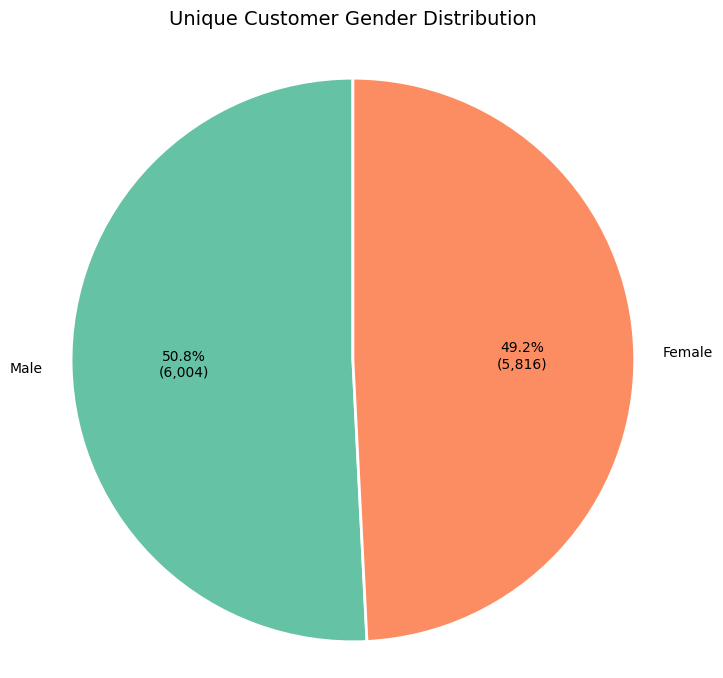

In [ ]:
gender_counts = sales_df.drop_duplicates(subset=['customer_id'])
gender_counts_unique = gender_counts['gender'].value_counts()
gender_percent_unique = gender_counts['gender'].value_counts(normalize=True)

gender_summary_unique = pd.DataFrame({
    'count': gender_counts_unique,
    'pct': gender_percent_unique
})

pie_chart_custom(gender_summary_unique['count'], gender_summary_unique.index,
                      title='Unique Customer Gender Distribution')

In [ ]:
sales_df.groupby(['store_type', 'gender'])[['revenue_usd', 'profit_usd']].sum().unstack().map(commas)

revenue_usd                    profit_usd               
gender             Female           Male         Female           Male
store_type                                                            
Instore     21,496,970.99  22,100,673.09  12,587,655.88  12,961,296.21
Online       5,392,647.00   5,725,900.03   3,158,277.48   3,346,995.12

> Insights:
  - Customer distribution is almost balanced with male 50.8% vs female 49.2%, but male customers generate higher revenue and profit consistently across all age groups.
  - Instore generated 4x the revenue as online ($43.6M vs $11.1M), indicating a strong preference for the physical shopping experience.

### Age

In [ ]:
revenue_year_age = sales_df.groupby(['year', 'age_dist'])['revenue_usd'].sum().unstack()
revenue_year_age.loc['Grand Total'] = revenue_year_age.sum()
revenue_year_age.map(commas)

age_dist,Early,Elderly,Mature,Prime
year,,,,
2016,"567,287.04","2,072,390.00","963,718.05","3,343,398.47"
2017,"768,619.87","2,285,057.79","1,164,736.43","3,203,008.18"
2018,"1,125,895.13","4,213,404.99","1,960,748.24","5,488,912.30"
2019,"1,780,022.48","5,550,654.47","2,758,760.64","8,174,944.89"
2020,"840,679.60","2,947,720.72","1,325,947.46","4,180,284.36"
Grand Total,"5,082,504.12","17,069,227.97","8,173,910.82","24,390,548.20"


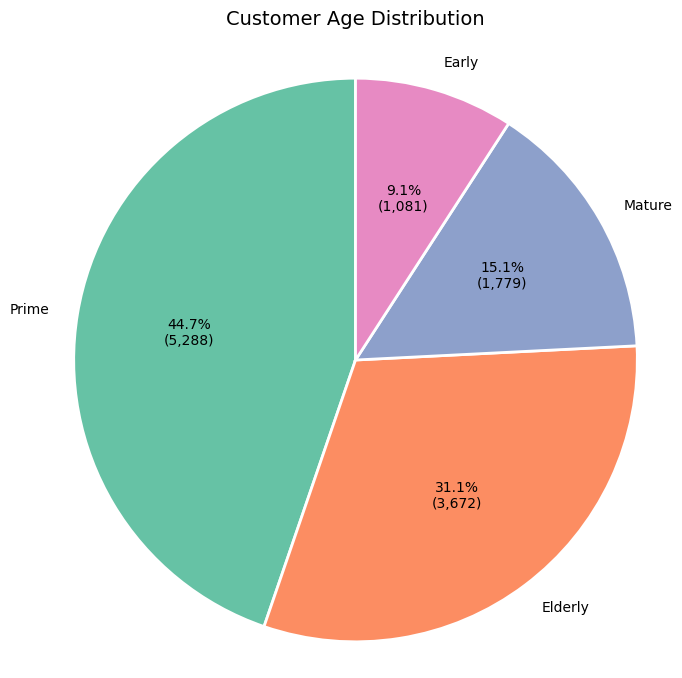

In [ ]:
age_counts = sales_df.drop_duplicates(subset=['customer_id'])
age_counts_unique = age_counts['age_dist'].value_counts()
pie_chart_custom(age_counts_unique.values, age_counts_unique.index,
                      title='Customer Age Distribution', palette='Set2')

In [ ]:
store_by_age = (
    age_counts.groupby('age_dist')['store_type']
    .value_counts()
)
store_by_age.map(commas).unstack()

store_type,Instore,Online
age_dist,,
Early,844,237
Elderly,"2,939",733
Mature,"1,426",353
Prime,"4,201","1,087"


In [ ]:
category_by_age = (
    age_counts.groupby('age_dist')['category']
    .value_counts()
    .unstack(fill_value=0)
)
category_by_age.map(commas)

category,Audio,Cameras and Camcorders,Cell Phones,Computers,Games and Toys,Home Appliances,"Music, Movies and Audio Books",TV and Video
age_dist,,,,,,,,
Early,140,93,159,229,98,128,167,67
Elderly,465,299,515,815,336,424,561,257
Mature,199,155,263,381,175,204,267,135
Prime,654,469,793,"1,088",535,626,773,350


> Insight:
  - Age group “Prime” dominates revenue across all years, with significant growth from 2016 ($3.3M) to 2019 ($8.2M) before dropping in 2020 due to Covid, indicating the company's main target.
  - The elderly group (65+ years) is also quite large, opening up opportunities for age-friendly products.
  - The young age group (15–24 years) and pre-retirement (55–64 years) are still low, can be reached through special strategies such as discounts or digital campaigns.

> Recommendation:
  - For the Prime age group, Provide products with high quality and good functionality (eg: work laptops, household appliances). Offer loyalty programs or family product bundling.
  - Increase engagement with Early, Create social media campaigns (TikTok, Instagram) and offer lifestyle or entertainment products such as gadgets, accessories, and fashion items.

In [ ]:
demographic_profile = sales_df.groupby(['age_dist', 'gender']).agg(
    unique_customers=('customer_id', 'nunique'),
    revenue_total=('revenue_usd', 'sum'),
    revenue_mean=('revenue_usd', 'mean'),
    revenue_median=('revenue_usd', 'median'),
    avg_age=('age', 'mean')
).round(2).sort_values(by='avg_age', ascending=True)

demographic_profile['aov'] = (demographic_profile['revenue_total'] / demographic_profile['unique_customers']).round(2)
demographic_profile['revenue_rank'] = demographic_profile['revenue_total'].rank(ascending=False)
demographic_profile.sort_values(by='revenue_rank', ascending=True).map(commas)

unique_customers  revenue_total revenue_mean revenue_median  \
age_dist gender                                                               
Prime    Female            2,598  12,305,789.30       899.87         362.00   
         Male              2,690  12,084,758.90       881.65         359.98   
Elderly  Male              1,869   8,799,145.09       904.89         359.98   
         Female            1,803   8,270,082.88       868.34         368.00   
Mature   Male                897   4,356,714.42       895.34         362.00   
         Female              882   3,817,196.40       878.32         359.98   
Early    Male                548   2,585,954.71       888.34         366.55   
         Female              533   2,496,549.41       855.28         330.00   

                avg_age       aov revenue_rank  
age_dist gender                                 
Prime    Female   39.39  4,736.64         1.00  
         Male     39.45  4,492.48         2.00  
Elderly  Male     75.01  4,707.94         3.00  
         Female   74.77  4,586.85         4.00  
Mature   Male     59.56  4,856.98         5.00  
         Female   59.32  4,327.89         6.00  
Early    Male     21.32  4,718.90         7.00  
         Female   21.43  4,683.96         8.00

> Insights:
  - The Prime segment dominated the business with the highest revenue contribution - Female Prime $12.3M and Male Prime $12.1M. Both genders performed equally with almost the same AOV (~$4,615), indicating that this segment is a very valuable core customer base.
  

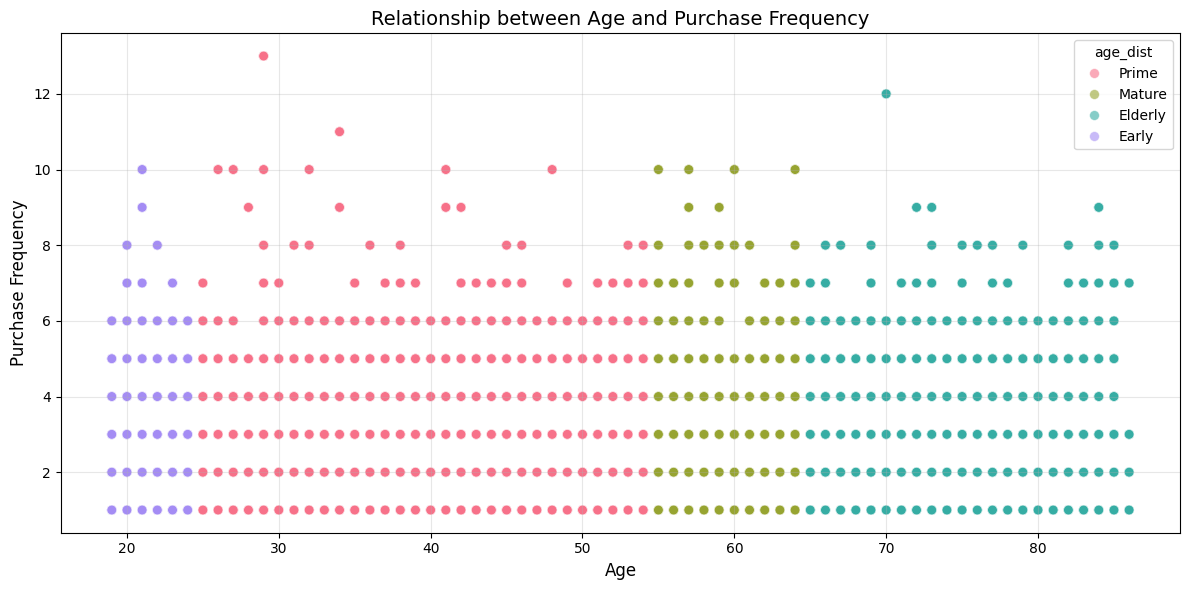

In [ ]:
sales_df['frequency'] = sales_df.groupby('customer_id')['order_number'].transform('nunique')

scatter_plot(sales_df['age'], sales_df['frequency'],
                  'Relationship between Age and Purchase Frequency',
                  'Age', 'Purchase Frequency',
                  hue=sales_df['age_dist'], palette='husl')

## Geographic Analysis

### Customer Distribution

In [ ]:
sales_df['customer_id'].nunique()

11820

In [ ]:
sales_df['order_number'].nunique()

25828

In [ ]:
repeat = sales_df.groupby(['year', 'customer_id'])['order_number'].nunique().reset_index()
repeat.rename(columns={'order_number': 'order_count'}, inplace=True)

customer_repeat_df = repeat.groupby('year').agg({
    'customer_id': 'nunique',
    'order_count': lambda x: (x > 1).sum()
}).reset_index()

customer_repeat_df.columns = ['year', 'unique_customers', 'repeat_customers']
customer_repeat_df['repeat_rate'] = round((customer_repeat_df['repeat_customers'] / customer_repeat_df['unique_customers']) * 100, 2)
customer_repeat_df['yoy_growth_customers'] = customer_repeat_df['unique_customers'].pct_change() * 100
customer_repeat_df['yoy_growth_customers'] = customer_repeat_df['yoy_growth_customers'].round(2)

cols = customer_repeat_df.columns.tolist()
cols_reordered = ['year', 'unique_customers', 'yoy_growth_customers', 'repeat_customers', 'repeat_rate']
customer_repeat_df = customer_repeat_df[cols_reordered]
customer_repeat_df.set_index('year').map(commas)

,unique_customers,yoy_growth_customers,repeat_customers,repeat_rate
year,,,,
2016,"2,561",NaN,280,10.93
2017,"2,907",13.51,340,11.70
2018,"4,765",63.91,"1,000",20.99
2019,"6,497",36.35,"1,958",30.14
2020,"3,868",-40.46,664,17.17


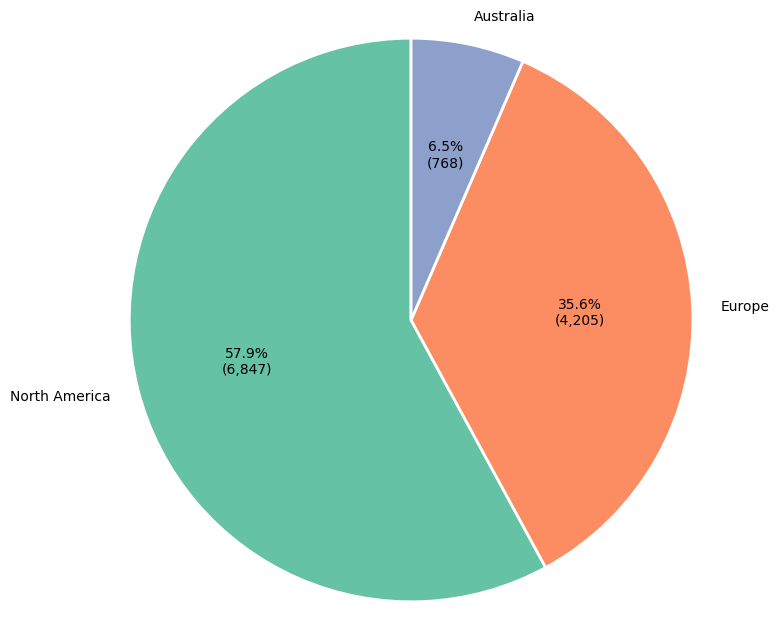

In [ ]:
customer_by_continent = sales_df.groupby('continent')['customer_id'].nunique().reset_index(name='num_customers').sort_values(by='num_customers', ascending=False)
pie_chart_custom(
  customer_by_continent['num_customers'],
  customer_by_continent['continent']
)

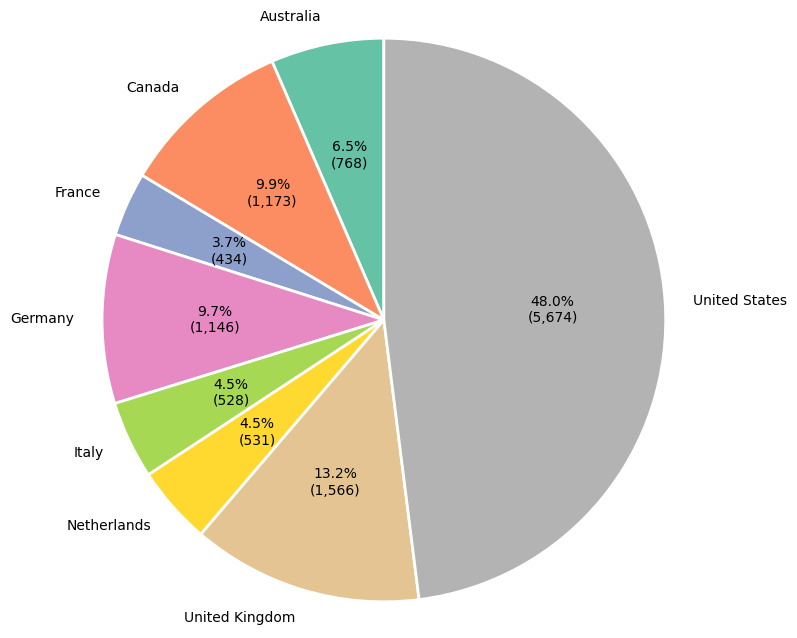

In [ ]:
customer_by_country = sales_df.groupby('customer_country')['customer_id'].nunique().reset_index(name='num_customers')

pie_chart_custom(
  customer_by_country['num_customers'],
  customer_by_country['customer_country']
)

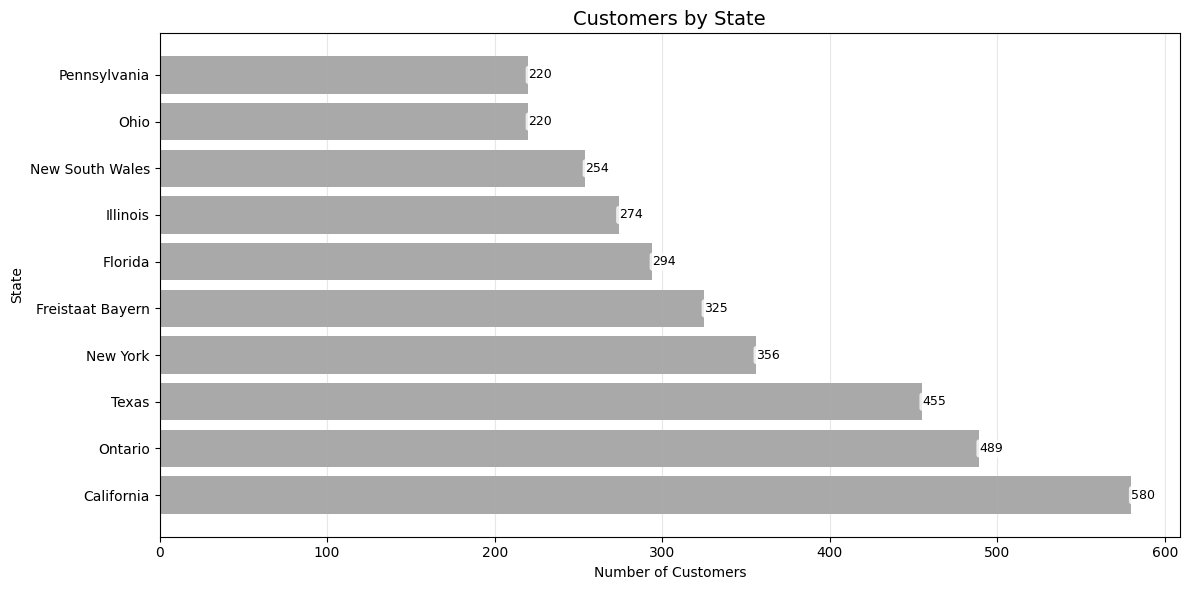

In [ ]:
customer_by_state = sales_df.groupby('customer_state')['customer_id'].nunique().reset_index(name='num_customers').query('num_customers > 0').sort_values(by='num_customers', ascending=False)
top_10_customer_state = customer_by_state.head(10)

barh_chart(
    x=top_10_customer_state['customer_state'],
    y=top_10_customer_state['num_customers'],
    title='Customers by State',
    xlabel='Number of Customers',
    ylabel='State'
)

In [ ]:
customer_by_city = sales_df.groupby(['customer_state','customer_city'])['customer_id'].nunique().reset_index(name='num_customers').query('num_customers > 0').sort_values(by='num_customers', ascending=False)
customer_by_city.head(10).map(commas)

,customer_state,customer_city,num_customers
4535,Ontario,Toronto,156
3716,New York,New York,110
797,California,Los Angeles,94
6004,Texas,Houston,76
2278,Illinois,Chicago,71
4914,Quebec,Montreal,70
5976,Texas,Dallas,55
105,Alberta,Calgary,53
4747,Pennsylvania,Philadelphia,47
1916,Georgia,Atlanta,45


> Insights
  - North America accounts for 58% of the total customer base (6,847 out of 11,820), indicating the company's main market is concentrated in this region.
  - California leads with 580 customers, but the relatively even distribution across the top states suggests no regional monopoly.
  - Top 3 cities (Toronto, New York, Los Angeles) account for 30% of the top 10 states, indicating urban-centric and metropolitan customer behavior.

In [ ]:
top_customer_by_each_country = (
    sales_df.groupby(['continent','customer_country', 'customer_state'])[['revenue_usd', 'profit_usd']].sum()
    .sort_values(by='revenue_usd', ascending=False)
    .groupby('customer_country')
    .head(1)
)
top_customer_by_each_country.map(commas)

revenue_usd    profit_usd
continent     customer_country customer_state                              
North America United States    California        3,004,712.06  1,761,351.60
              Canada           Ontario           1,943,096.76  1,134,155.02
Europe        Germany          Freistaat Bayern  1,553,457.42    917,316.83
Australia     Australia        New South Wales     894,482.52    529,075.65
Europe        France           Île-de-France       492,774.95    289,465.46
              Netherlands      Noord-Holland       352,318.41    208,756.61
              United Kingdom   Highland            298,936.65    172,723.81
              Italy            Salerno              93,840.80     55,148.61

### Store Distribution

In [ ]:
store_size_contribution = sales_df.groupby('store_size')[['revenue_usd', 'profit_usd']].sum()
store_size_contribution.map(commas)

,revenue_usd,profit_usd
store_size,,
Large,"26,442,941.08","15,485,596.07"
Medium,"15,684,807.14","9,196,182.91"
Online Store,"11,118,547.03","6,505,272.60"
Small,"1,469,895.86","867,173.11"


In [ ]:
store_filter = sales_df[sales_df['store_type'].isin(['Online', 'Instore'])]
store_comparison = store_filter.groupby('store_type')['revenue_usd'].sum().reset_index()

total_revenue = store_comparison['revenue_usd'].sum()
store_comparison['revenue_pct'] = (store_comparison['revenue_usd'] / total_revenue) * 100
store_comparison.map(commas)

,store_type,revenue_usd,revenue_pct
0,Instore,"43,597,644.08",79.68
1,Online,"11,118,547.03",20.32


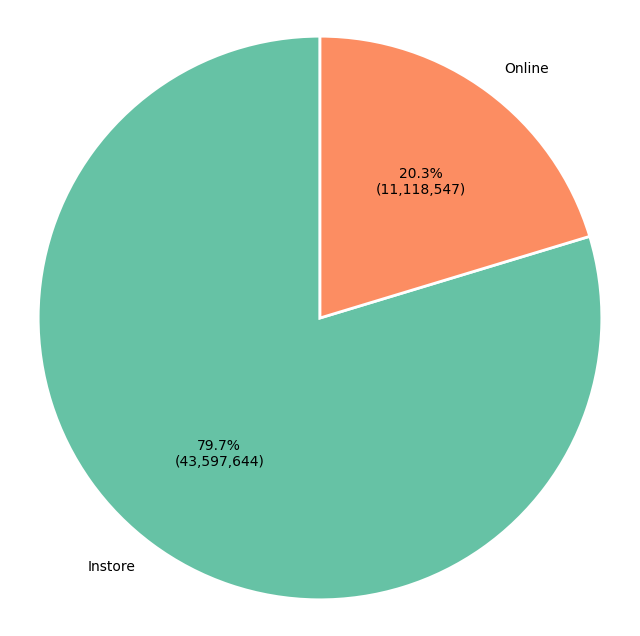

In [ ]:
pie_chart_custom(
  store_comparison['revenue_usd'],
  store_comparison['store_type']
)

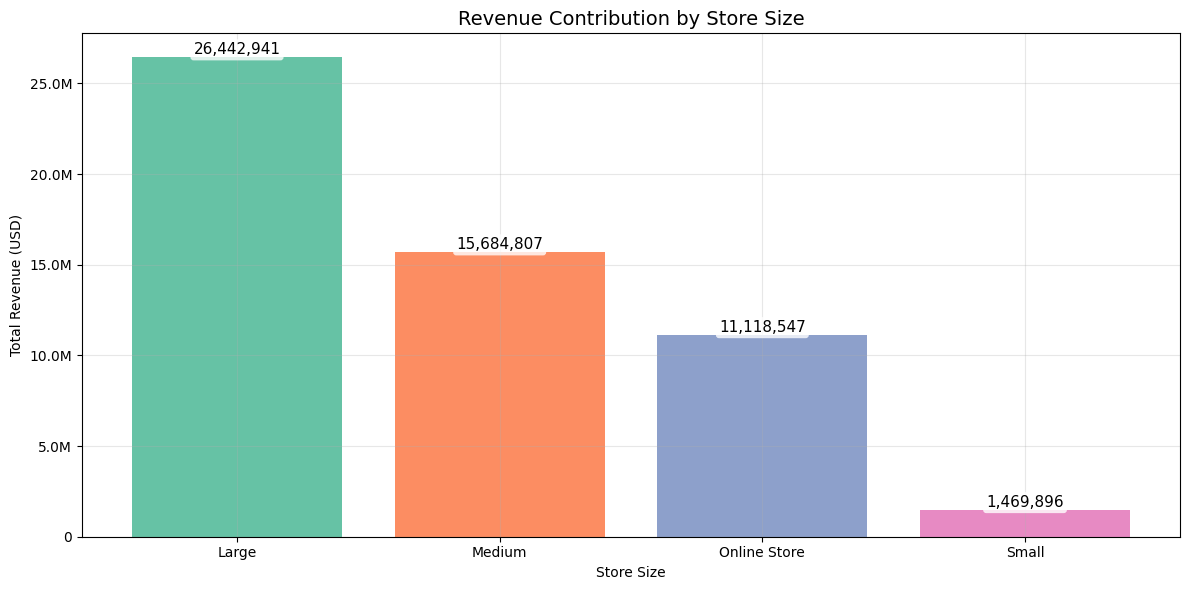

In [ ]:
bar_chart(
    x=store_size_contribution.index,
    y=store_size_contribution['revenue_usd'],
    title='Revenue Contribution by Store Size',
    xlabel='Store Size',
    ylabel='Total Revenue (USD)',
    color='darkgray',
    palette='Set2'
)

In [ ]:
store_size_performance = sales_df.groupby(['year', 'store_size']).agg({
    'revenue_usd': 'sum',
    'profit_usd': 'sum',
    'quantity': 'sum',
    'customer_id': 'nunique'
})

store_size_performance['revenue_efficiency'] = store_size_performance['revenue_usd'] / store_size_performance['quantity']
store_size_performance.map(commas)

revenue_usd    profit_usd quantity customer_id  \
year store_size                                                      
2016 Large         3,666,899.58  2,170,453.88   11,225       1,378   
     Medium        1,961,071.22  1,158,606.75    6,378         806   
     Online Store  1,169,315.86    691,238.72    3,613         461   
     Small           149,506.90     86,701.12      545          62   
2017 Large         3,841,657.29  2,247,638.49   12,393       1,541   
     Medium        2,024,872.02  1,182,051.58    6,903         863   
     Online Store  1,388,497.44    811,583.46    4,896         631   
     Small           166,395.52     95,790.53      606          65   
2018 Large         6,355,836.77  3,721,390.99   22,003       2,578   
     Medium        3,620,347.67  2,110,940.93   12,460       1,550   
     Online Store  2,582,287.13  1,496,182.66    9,242       1,183   
     Small           230,489.09    136,446.53      793         104   
2019 Large         8,489,398.35  4,953,313.36   32,400       3,558   
     Medium        5,304,558.67  3,124,394.54   19,131       2,241   
     Online Store  3,908,495.70  2,291,802.44   14,805       1,841   
     Small           561,929.76    328,228.56    2,104         227   
2020 Large         4,089,149.09  2,392,799.35   15,142       1,827   
     Medium        2,773,957.56  1,620,189.11   10,507       1,312   
     Online Store  2,069,950.90  1,214,465.32    7,718       1,025   
     Small           361,574.59    220,006.37    1,096         140   

                  revenue_efficiency  
year store_size                       
2016 Large                    326.67  
     Medium                   307.47  
     Online Store             323.64  
     Small                    274.32  
2017 Large                    309.99  
     Medium                   293.33  
     Online Store             283.60  
     Small                    274.58  
2018 Large                    288.86  
     Medium                   290.56  
     Online Store             279.41  
     Small                    290.65  
2019 Large                    262.02  
     Medium                   277.28  
     Online Store             264.00  
     Small                    267.08  
2020 Large                    270.05  
     Medium                   264.01  
     Online Store             268.20  
     Small                    329.90

In [ ]:
store_distribution = sales_df.groupby(['continent', 'store_country', 'store_state']).agg({
    'customer_id': 'nunique',
    'revenue_usd': ['sum', 'mean'],
}).round(2)

store_distribution['market_share_%'] = (
    store_distribution['revenue_usd', 'sum'] /
    store_distribution['revenue_usd', 'sum'].sum() * 100
)
store_distribution = store_distribution.dropna()
store_distribution.sort_values(by=('revenue_usd', 'sum'), ascending=False).map(commas).head(10)

customer_id   revenue_usd  \
                                                      nunique           sum   
continent     store_country store_state                                       
North America United States Kansas                        512  1,445,173.50   
                            Nebraska                      558  1,421,554.67   
                            Nevada                        528  1,412,041.60   
                            Oregon                        511  1,394,744.66   
                            New Mexico                    531  1,361,716.95   
                            Connecticut                   519  1,332,498.82   
                            South Carolina                520  1,317,949.48   
              Canada        Northwest Territories         507  1,313,503.69   
              United States Arkansas                      499  1,285,983.82   
                            Wyoming                       497  1,253,417.04   

                                                          market_share_%  
                                                     mean                 
continent     store_country store_state                                   
North America United States Kansas                 918.15           2.64  
                            Nebraska               921.29           2.60  
                            Nevada                 932.04           2.58  
                            Oregon                 908.63           2.55  
                            New Mexico             933.32           2.49  
                            Connecticut            878.38           2.44  
                            South Carolina         865.93           2.41  
              Canada        Northwest Territories  849.61           2.40  
              United States Arkansas               850.52           2.35  
                            Wyoming                956.81           2.29

In [ ]:
top_store_by_each_country = (
    sales_df.groupby(['continent','store_country', 'store_state'])[['revenue_usd', 'profit_usd']].sum()
    .sort_values(by='revenue_usd', ascending=False)
    .groupby('store_country')
    .head(1)
)
top_store_by_each_country['market_share_%'] = (
    top_store_by_each_country['revenue_usd'] /
    top_store_by_each_country['revenue_usd'].sum() * 100
)
top_store_by_each_country.map(commas)

revenue_usd  profit_usd  \
continent     store_country  store_state                                       
North America United States  Kansas                 1,445,173.50  847,915.84   
              Canada         Northwest Territories  1,313,503.69  761,921.09   
Europe        United Kingdom Belfast                  995,176.11  579,780.94   
              Italy          Pesaro                   951,317.06  558,792.24   
Australia     Australia      Victoria                 935,709.85  555,115.70   
Europe        Germany        Sachsen-Anhalt           708,140.37  419,447.66   
              Netherlands    Groningen                449,633.92  271,005.16   
              France         Mayotte                  221,986.19  132,930.08   

                                                   market_share_%  
continent     store_country  store_state                           
North America United States  Kansas                         20.58  
              Canada         Northwest Territories          18.71  
Europe        United Kingdom Belfast                        14.18  
              Italy          Pesaro                         13.55  
Australia     Australia      Victoria                       13.33  
Europe        Germany        Sachsen-Anhalt                 10.09  
              Netherlands    Groningen                       6.40  
              France         Mayotte                         3.16

### Continent Contribution

In [ ]:
continental_df = sales_df.groupby('continent').agg({
        'revenue_usd': ['sum', 'mean'],
        'profit_usd': ['sum', 'mean'],
        'order_number': 'nunique',
        'customer_id': 'nunique',
    }).sort_values(('revenue_usd', 'sum'), ascending=False).reset_index()

continental_df.columns = ['continent','revenue', 'avg_revenue','profit', 'avg_profit', 'orders', 'customers']
continental_df['revenue_share_%'] = (continental_df['revenue'] / continental_df['revenue'].sum() * 100).round(2)
continental_df['aov'] = (continental_df['revenue'] / continental_df['customers']).round(2)
continental_df['profit_margin'] = (continental_df['profit'] / continental_df['revenue'] * 100).round(2)

continental_df.map(commas)

,continent,revenue,avg_revenue,profit,avg_profit,orders,customers,revenue_share_%,aov,profit_margin
0,North America,"33,855,053.34",882.49,"19,811,839.43",516.43,"16,158","6,847",61.87,"4,944.51",58.52
1,Europe,"18,195,090.75",890.26,"10,669,031.94",522.02,"8,514","4,205",33.25,"4,327.01",58.64
2,Australia,"2,666,047.02",928.61,"1,573,353.32",548.02,"1,156",768,4.87,"3,471.42",59.01


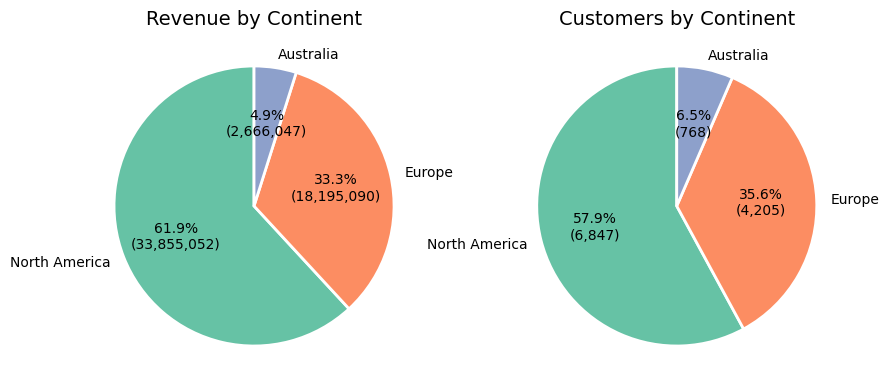

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

pie_chart_custom(
    continental_df['revenue'],
    continental_df['continent'],
    title='Revenue by Continent',
    ax=axes[0]
)

pie_chart_custom(
    continental_df['customers'],
    continental_df['continent'],
    title='Customers by Continent',
    ax=axes[1]
)

In [ ]:
yearly_continent = sales_df.groupby(['year', 'continent']).agg({
    'revenue_usd': ['sum', 'mean', 'count'],
    'customer_id': 'nunique',
}).round(2)
yearly_continent.columns = ['revenue', 'avg_revenue', 'order_count','unique_customers']
yearly_continent['revenue_pct'] = (yearly_continent['revenue'] / yearly_continent['revenue'].sum() * 100).round(2)
yearly_continent.map(commas)

revenue avg_revenue order_count unique_customers  \
year continent                                                               
2016 Australia         316,425.60    1,079.95         293              117   
     Europe          2,671,072.24    1,016.00       2,629              932   
     North America   3,959,295.72      994.05       3,983            1,512   
2017 Australia         374,790.53      991.51         378              139   
     Europe          2,519,695.00      911.61       2,764            1,011   
     North America   4,526,936.74      943.11       4,800            1,757   
2018 Australia         643,897.73      912.04         706              243   
     Europe          4,429,823.31      917.34       4,829            1,662   
     North America   7,715,239.62      891.63       8,653            2,860   
2019 Australia         890,276.61      877.98       1,014              357   
     Europe          5,738,811.52      836.56       6,860            2,133   
     North America  11,635,294.35      847.00      13,737            4,007   
2020 Australia         440,656.55      918.03         480              178   
     Europe          2,835,688.68      844.96       3,356            1,215   
     North America   6,018,286.91      837.04       7,190            2,475   

                   revenue_pct  
year continent                  
2016 Australia            0.58  
     Europe               4.88  
     North America        7.24  
2017 Australia            0.68  
     Europe               4.61  
     North America        8.27  
2018 Australia            1.18  
     Europe               8.10  
     North America       14.10  
2019 Australia            1.63  
     Europe              10.49  
     North America       21.26  
2020 Australia            0.81  
     Europe               5.18  
     North America       11.00

### Country Contribution

In [ ]:
country_df = sales_df.groupby(['continent','customer_country']).agg({
        'revenue_usd': ['sum', 'mean'],
        'profit_usd': ['sum', 'mean'],
        'order_number': 'nunique',
        'customer_id': 'nunique',
    }).sort_values(('revenue_usd', 'sum'), ascending=False).dropna()

country_df.columns = ['revenue', 'avg_revenue', 'profit', 'avg_profit', 'orders', 'customers']
country_df['revenue_per_customer'] = (country_df['revenue'] / country_df['customers']).round(2)
country_df['profit_margin'] = (country_df['profit'] / country_df['revenue'] * 100).round(2)
country_df.map(commas)

revenue avg_revenue         profit  \
continent     customer_country                                             
North America United States     29,224,626.17      883.67  17,109,487.98   
Europe        United Kingdom     6,982,514.16      871.62   4,072,587.96   
              Germany            5,340,362.16      907.92   3,142,164.68   
North America Canada             4,630,427.17      875.15   2,702,351.45   
Australia     Australia          2,666,047.02      928.61   1,573,353.32   
Europe        Italy              2,458,710.65      923.98   1,441,467.67   
              Netherlands        1,927,016.01      877.11   1,135,631.75   
              France             1,486,487.77      881.14     877,179.88   

                               avg_profit  orders customers  \
continent     customer_country                                
North America United States        517.34  13,927     5,674   
Europe        United Kingdom       508.37   3,371     1,566   
              Germany              534.20   2,408     1,146   
North America Canada               510.74   2,231     1,173   
Australia     Australia            548.02   1,156       768   
Europe        Italy                541.70   1,093       528   
              Netherlands          516.90     955       531   
              France               519.96     687       434   

                               revenue_per_customer profit_margin  
continent     customer_country                                     
North America United States                5,150.62         58.54  
Europe        United Kingdom               4,458.82         58.33  
              Germany                      4,660.00         58.84  
North America Canada                       3,947.51         58.36  
Australia     Australia                    3,471.42         59.01  
Europe        Italy                        4,656.65         58.63  
              Netherlands                  3,629.03         58.93  
              France                       3,425.09         59.01

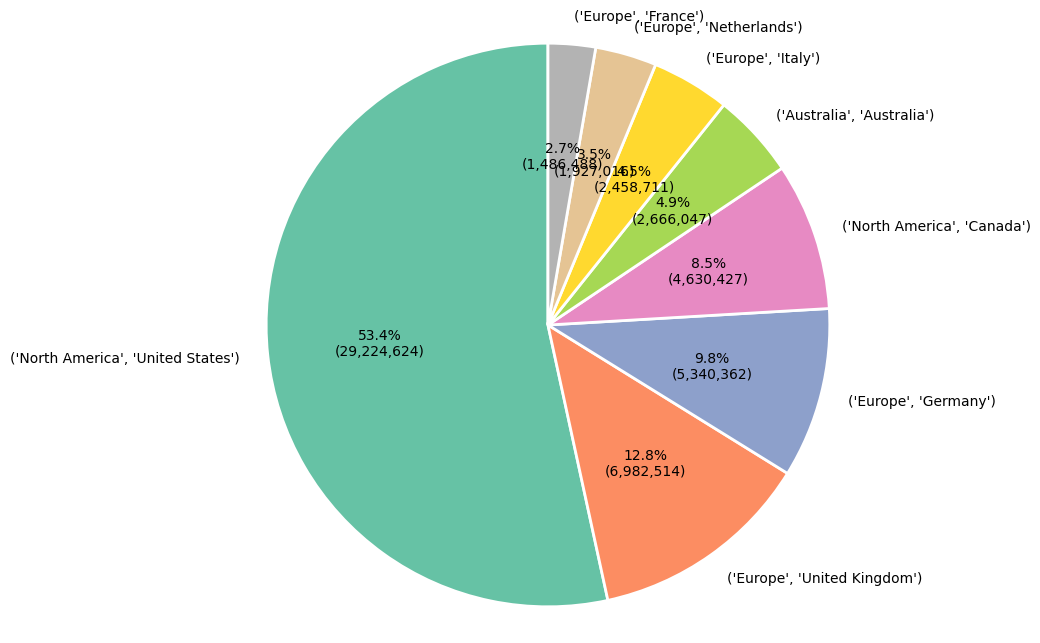

In [ ]:
pie_chart_custom(
  country_df['revenue'],
  country_df.index,
)

In [ ]:
yearly_sales_by_country = sales_df.pivot_table(
    values="revenue_usd",
    index="year",
    columns="store_country",
    aggfunc="sum")

yearly_sales_by_country.loc["Total"] = yearly_sales_by_country.sum()
yearly_sales_by_country.map(commas)

store_country,Australia,Canada,France,Germany,Italy,Netherlands,United Kingdom,United States
year,,,,,,,,
2016,"316,425.60","608,348.62","188,645.05","691,106.47","441,673.51","250,355.53","1,099,291.68","3,350,947.10"
2017,"374,790.53","669,610.65","184,863.72","584,342.17","394,395.31","217,583.41","1,138,510.39","3,857,326.09"
2018,"643,897.73","1,100,914.05","312,786.49","1,336,981.32","607,591.26","475,417.45","1,697,046.79","6,614,325.57"
2019,"890,276.61","1,502,227.97","474,990.53","1,874,921.45","707,836.08","639,132.95","2,041,930.51","10,133,066.38"
2020,"440,656.55","749,325.88","325,201.98","853,010.75","307,214.49","344,526.67","1,005,734.79","5,268,961.03"
Total,"2,666,047.02","4,630,427.17","1,486,487.77","5,340,362.16","2,458,710.65","1,927,016.01","6,982,514.16","29,224,626.17"


In [ ]:
yearly_country = sales_df.groupby(['year', 'customer_country']).agg({
    'revenue_usd': ['sum', 'mean', 'count'],
    'customer_id': 'nunique',
}).round(2)
yearly_country.columns = ['revenue', 'avg_revenue', 'order_count','unique_customers']
yearly_country['revenue_pct'] = (yearly_country['revenue'] / yearly_country['revenue'].sum() * 100).round(2)
yearly_country.map(commas)

revenue avg_revenue order_count unique_customers  \
year customer_country                                                           
2016 Australia            316,425.60    1,079.95         293              117   
     Canada               608,348.62      958.03         635              245   
     France               188,645.05      911.33         207               75   
     Germany              691,106.47    1,123.75         615              206   
     Italy                441,673.51    1,066.84         414              142   
     Netherlands          250,355.53    1,069.90         234               87   
     United Kingdom     1,099,291.68      948.48       1,159              422   
     United States      3,350,947.10    1,000.88       3,348            1,267   
2017 Australia            374,790.53      991.51         378              139   
     Canada               669,610.65      888.08         754              273   
     France               184,863.72      828.99         223               76   
     Germany              584,342.17      911.61         641              258   
     Italy                394,395.31      915.07         431              145   
     Netherlands          217,583.41      873.83         249              101   
     United Kingdom     1,138,510.39      933.21       1,220              431   
     United States      3,857,326.09      953.37       4,046            1,484   
2018 Australia            643,897.73      912.04         706              243   
     Canada             1,100,914.05      915.14       1,203              442   
     France               312,786.49      917.26         341              126   
     Germany            1,336,981.32      945.53       1,414              468   
     Italy                607,591.26    1,024.61         593              205   
     Netherlands          475,417.45      885.32         537              195   
     United Kingdom     1,697,046.79      872.97       1,944              668   
     United States      6,614,325.57      887.83       7,450            2,418   
2019 Australia            890,276.61      877.98       1,014              357   
     Canada             1,502,227.97      835.04       1,799              581   
     France               474,990.53      848.20         560              195   
     Germany            1,874,921.45      849.15       2,208              657   
     Italy                707,836.08      829.82         853              255   
     Netherlands          639,132.95      828.97         771              260   
     United Kingdom     2,041,930.51      827.36       2,468              766   
     United States     10,133,066.38      848.81      11,938            3,426   
2020 Australia            440,656.55      918.03         480              178   
     Canada               749,325.88      832.58         900              339   
     France               325,201.98      913.49         356              138   
     Germany              853,010.75      849.61       1,004              346   
     Italy                307,214.49      830.31         370              119   
     Netherlands          344,526.67      848.59         406              161   
     United Kingdom     1,005,734.79      824.37       1,220              451   
     United States      5,268,961.03      837.67       6,290            2,136   

                      revenue_pct  
year customer_country              
2016 Australia               0.58  
     Canada                  1.11  
     France                  0.34  
     Germany                 1.26  
     Italy                   0.81  
     Netherlands             0.46  
     United Kingdom          2.01  
     United States           6.12  
2017 Australia               0.68  
     Canada                  1.22  
     France                  0.34  
     Germany                 1.07  
     Italy                   0.72  
     Netherlands             0.40  
     United Kingdom          2.08  
     United St

### State

In [ ]:
state_df = sales_df.groupby(['continent', 'customer_country', 'customer_state']).agg({
    'customer_id': 'nunique',
    'revenue_usd': ['sum', 'mean'],
    'customer_id': 'nunique'
}).round(2)

state_df['market_share_%'] = (
    state_df['revenue_usd', 'sum'] /
    state_df['revenue_usd', 'sum'].sum() * 100
)
state_df = state_df.dropna()
state_df.sort_values(by=('revenue_usd', 'sum'), ascending=False).map(commas).head(10)

customer_id   revenue_usd  \
                                                    nunique           sum   
continent     customer_country customer_state                               
North America United States    California               580  3,004,712.06   
                               Texas                    455  2,190,718.80   
              Canada           Ontario                  489  1,943,096.76   
              United States    New York                 356  1,628,995.47   
Europe        Germany          Freistaat Bayern         325  1,553,457.42   
North America United States    Florida                  294  1,496,354.40   
                               Pennsylvania             220  1,327,085.96   
                               Illinois                 274  1,273,248.88   
                               Ohio                     220  1,162,012.09   
                               Michigan                 213  1,137,685.43   

                                                        market_share_%  
                                                   mean                 
continent     customer_country customer_state                           
North America United States    California        844.02           5.49  
                               Texas             874.89           4.00  
              Canada           Ontario           888.88           3.55  
              United States    New York          838.39           2.98  
Europe        Germany          Freistaat Bayern  947.23           2.84  
North America United States    Florida           911.86           2.73  
                               Pennsylvania      939.20           2.43  
                               Illinois          886.05           2.33  
                               Ohio              903.59           2.12  
                               Michigan          823.81           2.08

## Product Performance Analysis

In [ ]:
print(f"Category: {sales_df['category'].nunique()}")
print(f"Subcategory: {sales_df['subcategory'].nunique()}")
print(f"Product: {sales_df['product_name'].nunique()}")

Category: 8
Subcategory: 32
Product: 2341


### Category

In [ ]:
category_performance = (sales_df.groupby('category')
    .agg(
        total_revenue=('revenue_usd', 'sum'),
        total_profit=('profit_usd', 'sum'),
        unit_price_mean=('unit_price_usd', 'mean'),
        quantity=('quantity', 'sum'),
        num_product=('product_name',pd.Series.nunique),
    )
    .assign(profit_per_item=lambda x: x['total_profit'] / x['quantity'], profit_margin=lambda x: (x['total_profit'] / x['total_revenue']) * 100).round(2).sort_values('total_revenue', ascending=False)
).reset_index().sort_values('total_revenue', ascending=False)
category_performance.map(commas)

,category,total_revenue,total_profit,unit_price_mean,quantity,num_product,profit_per_item,profit_margin
0,Computers,"18,855,849.81","11,015,955.09",433.65,"43,169",566,255.18,58.42
1,Home Appliances,"10,718,396.53","6,251,254.92",579.17,"18,245",613,342.63,58.32
2,Cameras and Camcorders,"6,390,971.03","3,842,242.81",370.74,"17,299",340,222.11,60.12
3,Cell Phones,"6,024,337.18","3,406,513.15",196.11,"30,739",276,110.82,56.55
4,TV and Video,"5,827,030.81","3,478,109.90",528.27,"10,990",220,316.48,59.69
5,Audio,"3,126,330.84","1,803,037.28",135.08,"23,167",115,77.83,57.67
6,"Music, Movies and Audio Books","3,063,600.66","1,868,778.38",107.76,"28,215",45,66.23,61.00
7,Games and Toys,"709,674.25","388,333.16",32.35,"22,136",166,17.54,54.72


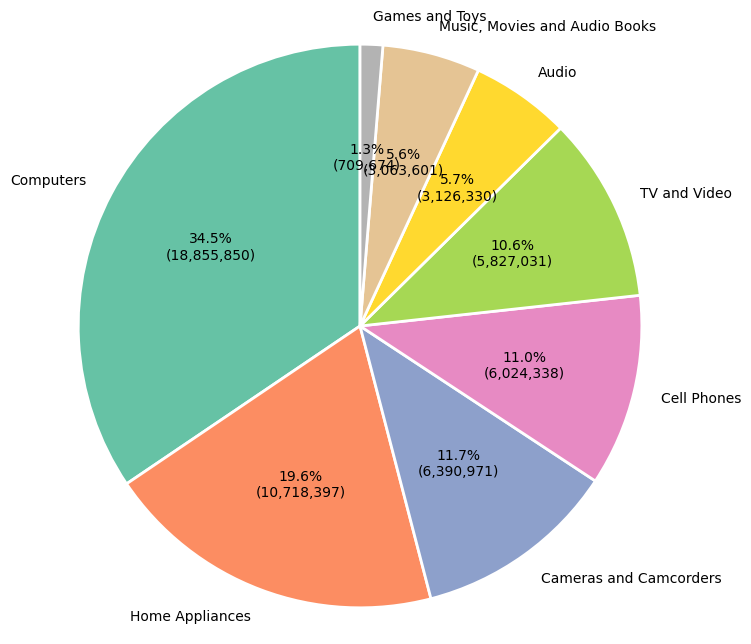

In [ ]:
pie_chart_custom(
  category_performance['total_revenue'],
  category_performance['category']
)

In [ ]:
yearly_sales_by_category = sales_df.pivot_table(
    values="revenue_usd",
    index="year",
    columns="category",
    aggfunc="sum",
    margins=True,
    margins_name="Total"
)
yearly_sales_by_category.map(commas)

category,Audio,Cameras and Camcorders,Cell Phones,Computers,Games and Toys,Home Appliances,"Music, Movies and Audio Books",TV and Video,Total
year,,,,,,,,,
2016,"339,347.76","946,180.01","429,497.27","1,496,820.33","52,529.59","2,010,476.12","405,566.38","1,266,376.10","6,946,793.56"
2017,"472,047.95","721,318.38","653,410.88","2,228,431.91","63,581.86","2,065,843.64","397,432.57","819,355.08","7,421,422.27"
2018,"798,011.81","1,254,125.63","1,372,745.57","4,507,043.96","143,730.36","2,834,487.33","685,150.86","1,193,665.14","12,788,960.66"
2019,"1,064,197.77","2,260,124.97","2,311,957.73","6,958,430.89","295,643.31","2,700,287.88","1,008,971.45","1,664,768.48","18,264,382.48"
2020,"452,725.55","1,209,222.04","1,256,725.73","3,665,122.72","154,189.13","1,107,301.56","566,479.40","882,866.01","9,294,632.14"
Total,"3,126,330.84","6,390,971.03","6,024,337.18","18,855,849.81","709,674.25","10,718,396.53","3,063,600.66","5,827,030.81","54,716,191.11"


### Subcategory

In [ ]:
subcategory_performance = (sales_df.groupby(['category','subcategory'])
    .agg(
        num_product=('product_name',pd.Series.nunique),
        unit_price_mean=('unit_price_usd', 'mean'),
        quantity=('quantity', 'sum'),
        revenue_usd=('revenue_usd', 'sum'),
        profit_usd=('profit_usd', 'sum'),
    )
    .assign(profit_per_item=lambda x: x['profit_usd'] / x['quantity'], profit_margin=lambda x: (x['profit_usd'] / x['revenue_usd']) * 100).round(2).sort_values('revenue_usd', ascending=False)
).reset_index().dropna()

total_quantity = subcategory_performance['quantity'].sum()
total_revenue = subcategory_performance['revenue_usd'].sum()
subcategory_performance['revenue_pct'] = (subcategory_performance['revenue_usd'] / total_revenue * 100).round(2)
subcategory_performance['quantity_pct'] = (subcategory_performance['quantity'] / total_quantity * 100).round(2)

In [ ]:
subcategory_performance.set_index(['category', 'subcategory']).map(commas)

num_product  \
category                      subcategory                                    
Computers                     Desktops                                  45   
TV and Video                  Televisions                               50   
Computers                     Projectors & Screens                      78   
Home Appliances               Water Heaters                             31   
Cameras and Camcorders        Camcorders                               103   
Computers                     Laptops                                   78   
Music, Movies and Audio Books Movie DVD                                 45   
Cell Phones                   Touch Screen Phones                       53   
                              Smart phones & PDAs                      101   
Home Appliances               Refrigerators                             86   
                              Washers & Dryers                          69   
Cameras and Camcorders        Digital SLR Cameras                       68   
Computers                     Monitors                                  63   
Audio                         Bluetooth Headphones                      50   
                              Recording Pen                             20   
Home Appliances               Coffee Machines                           50   
                              Microwaves                               102   
Cameras and Camcorders        Digital Cameras                          100   
Computers                     Printers, Scanners & Fax                 101   
TV and Video                  Home Theater System                       98   
Games and Toys                Download Games                           120   
TV and Video                  Car Video                                 46   
Audio                         MP4 & MP3                                 45   
Cameras and Camcorders        Cameras & Camcorders Accessories          69   
Home Appliances               Air Conditioners                          62   
TV and Video                  VCD & DVD                                 26   
Home Appliances               Lamps                                    135   
Computers                     Computers Accessories                    201   
Cell Phones                   Home & Office Phones                      92   
                              Cell Phones Accessories                   30   
Home Appliances               Fans                                      78   
Games and Toys                Boxed Games                               46   

                                                               unit_price_mean  \
category                      subcategory                                        
Computers                     Desktops                                  479.69   
TV and Video                  Televisions                               762.69   
Computers                     Projectors & Screens                      773.47   
Home Appliances               Water Heaters                             773.23   
Cameras and Camcorders        Camcorders                                752.69   
Computers                     Laptops                                   649.57   
Music, Movies and Audio Books Movie DVD                                 107.76   
Cell Phones                   Touch Screen Phones                       288.69   
                              Smart phones & PDAs                       278.59   
Home Appliances               Refrigerators                             886.89   
                              Washers & Dryers                        1,807.34   
Cameras and Camcorders        Digital SLR Cameras                       444.16   
Computers                     Monitors                                  328.87   
Audio                         Bluetooth Headphones                      101.28   
                              Recording Pen                             198.57   
Home Appliances 

### Product

In [ ]:
top_product = (
    sales_df.groupby(['product_name'])[['revenue_usd', 'profit_usd']].sum()
    .sort_values(by='revenue_usd', ascending=False)
    .groupby('product_name')
).head(1)
top_product['revenue_contribution_pct'] = (top_product['revenue_usd'] / total_revenue * 100).round(2)
top_product.map(commas)

,revenue_usd,profit_usd,revenue_contribution_pct
product_name,,,
Desktop PC2.33 X2330 Black,"498,098.00","333,069.84",0.91
Desktop PC2.33 XD233 Brown,"454,461.00","303,888.55",0.83
Desktop PC2.33 XD233 Black,"442,833.00","296,113.15",0.81
Desktop PC2.33 XD233 Silver,"438,957.00","293,521.35",0.80
Desktop PC2.33 XD233 White,"428,298.00","286,393.90",0.78
...,...,...,...
USB Data Cable E600 Pink,25.65,12.69,0.00
USB Data Cable E600 Grey,21.85,10.81,0.00
80mm Dual Ball Bearing Case Fan E1001 Green,19.96,9.80,0.00


In [ ]:
top_product_country = (
    sales_df.groupby(['store_country', 'category','brand', 'product_name'])[['revenue_usd', 'profit_usd']].sum()
    .sort_values(by='profit_usd', ascending=False)
    .groupby('store_country')
).head(1)
top_product_country.map(commas)

,,,,revenue_usd,profit_usd
store_country,category,brand,product_name,,
United States,Computers,Wide World Importers,Desktop PC2.33 X2330 Black,"294,999.00","197,260.92"
Germany,TV and Video,Adventure Works,"52"" LCD HDTV X590 Silver","115,999.60","77,566.80"
United Kingdom,Computers,Adventure Works,Desktop PC2.33 XD233 Brown,"70,737.00","47,300.35"
Canada,Computers,Adventure Works,Desktop PC2.33 XD233 Silver,"56,202.00","37,581.10"
Australia,TV and Video,Adventure Works,"52"" LCD HDTV X790W Brown","41,397.20","27,681.42"
Italy,TV and Video,Adventure Works,"52"" LCD HDTV X590 Silver","37,699.87","25,209.21"
France,Computers,Adventure Works,Desktop PC2.33 XD233 Silver,"30,039.00","20,086.45"
Netherlands,TV and Video,Adventure Works,"52"" LCD HDTV X590 White","28,999.90","19,391.70"


### Brand

In [ ]:
brand_df = sales_df.groupby('brand').agg({
    'revenue_usd': 'sum',
    'profit_usd': 'sum',
    'customer_id': 'nunique',
}).sort_values('revenue_usd', ascending=False).reset_index()
brand_df['profit_margin'] = (brand_df['profit_usd'] / brand_df['revenue_usd']) * 100
brand_df = brand_df.dropna()

total_revenue = brand_df['revenue_usd'].sum()
brand_df['contribution'] = (brand_df['revenue_usd'] / total_revenue * 100).round(2)
brand_df.map(commas).set_index('brand')

,revenue_usd,profit_usd,customer_id,profit_margin,contribution
brand,,,,,
Adventure Works,"11,611,171.12","6,797,399.32","4,553",58.54,21.22
Contoso,"10,628,523.15","6,223,672.56","7,924",58.56,19.42
Wide World Importers,"8,999,856.61","5,266,222.39","5,634",58.51,16.45
Fabrikam,"6,705,444.86","4,001,294.37","2,895",59.67,12.25
The Phone Company,"5,241,537.00","2,973,667.38","4,382",56.73,9.58
Proseware,"3,134,110.19","1,888,734.91","2,489",60.26,5.73
Litware,"2,621,217.13","1,531,889.13","1,510",58.44,4.79
Southridge Video,"2,522,812.26","1,490,631.42","5,268",59.09,4.61
A. Datum,"1,462,315.20","869,214.13","1,627",59.44,2.67


In [ ]:
brand_performance = sales_df.groupby(['brand', 'category']).agg({
    'revenue_usd': 'sum',
    'profit_usd': 'sum',
    'customer_id': 'nunique',
}).sort_values(['brand','revenue_usd'], ascending=[True,False]).reset_index()
brand_performance['profit_margin'] = (brand_performance['profit_usd'] / brand_performance['revenue_usd']) * 100
brand_performance = brand_performance.dropna()

brand_performance.map(commas).set_index(['brand', 'category'])

revenue_usd  \
brand                category                                      
A. Datum             Cameras and Camcorders         1,462,315.20   
Adventure Works      Computers                      6,969,157.00   
                     TV and Video                   4,244,100.31   
                     Home Appliances                  397,913.81   
Contoso              Home Appliances                5,230,664.33   
                     Music, Movies and Audio Books  1,539,334.12   
                     Computers                      1,298,858.69   
                     Cameras and Camcorders           985,409.03   
                     Cell Phones                      782,800.18   
                     Audio                            469,664.80   
                     TV and Video                     321,792.00   
Fabrikam             Cameras and Camcorders         3,943,246.80   
                     Home Appliances                1,927,625.21   
                     Computers                        834,572.85   
Litware              Home Appliances                2,242,291.23   
                     TV and Video                     378,925.90   
Northwind Traders    Home Appliances                  621,488.40   
                     Audio                            499,231.84   
Proseware            Computers                      2,904,137.85   
                     Home Appliances                  229,972.34   
Southridge Video     Music, Movies and Audio Books  1,524,266.54   
                     TV and Video                     882,212.60   
                     Computers                         75,142.22   
                     Games and Toys                    41,190.90   
Tailspin Toys        Games and Toys                   668,483.35   
The Phone Company    Cell Phones                    5,241,537.00   
Wide World Importers Computers                      6,773,981.20   
                     Audio                          2,157,434.20   
                     Home Appliances                   68,441.21   

                                                      profit_usd customer_id  \
brand                category                                                  
A. Datum             Cameras and Camcorders           869,214.13       1,627   
Adventure Works      Computers                      3,971,674.38       3,368   
                     TV and Video                   2,593,288.33       1,592   
                     Home Appliances                  232,436.61         312   
Contoso              Home Appliances                3,003,232.39       2,112   
                     Music, Movies and Audio Books    937,383.79       3,567   
                     Computers                        805,327.81       1,456   
                     Cameras and Camcorders           595,331.99       1,627   
                     Cell Phones                      432,845.77       3,214   
                     Audio                            274,705.88         973   
                     TV and Video                     174,844.93         225   
Fabrikam             Cameras and Camcorders         2,377,696.69       1,654   
                     Home Appliances                1,172,376.02       1,092   
                     Computers                        451,221.66         472   
Litware              Home Appliances                1,317,989.82       1,340   
                     TV and Video                     213,899.31         192   
Northwind Traders    Home Appliances                  354,112.20          96   
                     Audio                            292,170.03       2,009   
Proseware            Computers                      1,756,636.62       2,321   
                     Home Appliances                  132,098.29         221   
Southridge Video     Music, Movies and Audio Books    931,394.59       3,535   
                     TV and Video                     496,077.33       1,211   
                     Com

> Insights:
  - Each brand tends to focus on 1-2 leading categories, showing a clear specialization strategy in the product portfolio.
  - Wide World Importers and Adventure Works dominate the Computers category with revenue of $6.77M and $6.97M respectively, indicating intense competition in the premium technology segment.
  - Contoso has the highest profit margin (62%) but limited customer base, while market leaders maintain solid margins of 56-59% with mass penetration.

In [ ]:
top_brands_country = (
    sales_df.groupby(['store_country', 'category', 'brand'])[['revenue_usd', 'profit_usd']].sum()
    .sort_values(by='revenue_usd', ascending=False)
    .groupby('store_country')
).head(1)
top_brands_country.map(commas)

,,,revenue_usd,profit_usd
store_country,category,brand,,
United States,Computers,Adventure Works,"3,672,800.75","2,088,001.97"
United Kingdom,Computers,Adventure Works,"932,853.45","532,044.08"
Germany,Computers,Wide World Importers,"722,935.05","426,915.41"
Canada,Computers,Adventure Works,"590,815.90","337,194.02"
Italy,Computers,Adventure Works,"359,898.00","206,200.07"
Australia,Home Appliances,Contoso,"313,987.94","181,273.72"
Netherlands,Computers,Adventure Works,"271,778.75","158,584.82"
France,Computers,Adventure Works,"199,523.25","117,466.54"


In [ ]:
bottom_brands_country = (
    sales_df.groupby(['store_country', 'brand'])[['revenue_usd', 'profit_usd']].sum()
    .sort_values(by='revenue_usd', ascending=False)
    .groupby('store_country')
).tail(1)
bottom_brands_country.map(commas)

,,revenue_usd,profit_usd
store_country,brand,,
United States,Tailspin Toys,"363,347.47","197,024.72"
United Kingdom,Tailspin Toys,"77,604.76","42,403.60"
Germany,Tailspin Toys,"60,731.47","32,995.12"
Canada,Tailspin Toys,"51,674.18","27,619.96"
Italy,Tailspin Toys,"39,259.19","22,854.08"
Australia,Tailspin Toys,"29,114.12","15,927.80"
Netherlands,Tailspin Toys,"26,047.32","14,507.50"
France,Northwind Traders,"18,867.59","11,015.40"


In [ ]:
summary = {
    'top_region': sales_df.groupby('customer_country')['revenue_usd'].sum().idxmax(),
    'top_category': sales_df.groupby('category')['revenue_usd'].sum().idxmax(),
    'top_brand': sales_df.groupby('brand')['revenue_usd'].sum().idxmax(),
    'total_revenue': sales_df['revenue_usd'].sum(),
    'total_profit': sales_df['profit_usd'].sum(),
    'total_orders': sales_df['customer_id'].count(),
    'unique_customers': sales_df['customer_id'].nunique(),
    'avg_order_value': sales_df['revenue_usd'].sum() / sales_df['customer_id'].count(),
    'profit_margin': (sales_df['profit_usd'].sum() / sales_df['revenue_usd'].sum()) * 100
}

executive_summary = pd.Series(summary)
executive_summary

top_region            United States
top_category              Computers
top_brand           Adventure Works
total_revenue           54716191.11
total_profit            32054224.69
total_orders                  61672
unique_customers              11820
avg_order_value              887.21
profit_margin                 58.58
dtype: object

## Business Performance Analysis

### YoY Business Performance

In [ ]:
yearly_df = sales_df.groupby('year').agg({
    'revenue_usd': ['sum', 'mean'],
    'profit_usd': ['sum', 'mean'],
    'order_number' : 'nunique',
    'customer_id': 'nunique',
}).round(2).reset_index()

yearly_df.columns = ['year','revenue', 'avg_revenue', 'profit', 'avg_profit', 'order_count','unique_customers']

yearly_df['profit_margin'] = (yearly_df['profit'] / yearly_df['revenue'] * 100).round(2)
yearly_df['revenue_pct'] = (yearly_df['revenue'] / yearly_df['revenue'].sum() * 100).round(2)
yearly_df['revenue_yoy'] = yearly_df['revenue'].pct_change() * 100
yearly_df['revenue_yoy'] = yearly_df['revenue_yoy'].round(2)

yearly_df.map(commas)

,year,revenue,avg_revenue,profit,avg_profit,order_count,unique_customers,profit_margin,revenue_pct,revenue_yoy
0,"2,016","6,946,793.56","1,006.05","4,107,000.47",594.79,"2,865","2,561",59.12,12.70,NaN
1,"2,017","7,421,422.27",934.45,"4,337,064.06",546.09,"3,280","2,907",58.44,13.56,6.83
2,"2,018","12,788,960.66",901.39,"7,464,961.11",526.15,"5,965","4,765",58.37,23.37,72.32
3,"2,019","18,264,382.48",845.14,"10,697,738.90",495.01,"9,083","6,497",58.57,33.38,42.81
4,"2,020","9,294,632.14",842.97,"5,447,460.15",494.06,"4,635","3,868",58.61,16.99,-49.11


In [ ]:
yearly_df.describe().map(commas)

,year,revenue,avg_revenue,profit,avg_profit,order_count,unique_customers,profit_margin,revenue_pct,revenue_yoy
count,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,4.00
mean,"2,018.00","10,943,238.22",906.00,"6,410,844.94",531.22,"5,165.60","4,119.60",58.62,20.00,18.21
std,1.58,"4,693,040.17",68.04,"2,739,753.52",41.77,"2,505.74","1,583.63",0.29,8.58,52.26
min,"2,016.00","6,946,793.56",842.97,"4,107,000.47",494.06,"2,865.00","2,561.00",58.37,12.70,-49.11
25%,"2,017.00","7,421,422.27",845.14,"4,337,064.06",495.01,"3,280.00","2,907.00",58.44,13.56,-7.15
50%,"2,018.00","9,294,632.14",901.39,"5,447,460.15",526.15,"4,635.00","3,868.00",58.57,16.99,24.82
75%,"2,019.00","12,788,960.66",934.45,"7,464,961.11",546.09,"5,965.00","4,765.00",58.61,23.37,50.19
max,"2,020.00","18,264,382.48","1,006.05","10,697,738.90",594.79,"9,083.00","6,497.00",59.12,33.38,72.32


In [ ]:
sales_df.groupby('year').agg({
    'customer_id': 'nunique',
}).round(2).reset_index()

,year,customer_id
0,2016,2561
1,2017,2907
2,2018,4765
3,2019,6497
4,2020,3868


In [ ]:
sales_df.head(1)

,name,customer_id,gender,birthday,age,age_dist,continent,customer_country,customer_state,state_code,customer_city,zip_code,order_number,line_item,order_date,delivery_date,delivery_time,year,month,month_number,quarter,day_name,day_type,quantity,product_name,brand,color,category,subcategory,unit_cost_usd,unit_price_usd,storekey,store_country,store_state,square_meters,store_size,store_type,open_date,currency,exchange,revenue_usd,revenue_local,revenue_local_currency,profit_usd,profit_local,profit_local_currency,frequency
0,Tyler Vaught,265598,Male,1971-03-23,49,Prime,North America,Canada,Ontario,ON,London,N5W 5K6,366000,1,2016-01-01,NaT,NaN,2016,2016-01,1,1,Friday,Weekday,1,Lens Adapter M450 White,Contoso,White,Cameras and Camcorders,Cameras & Camcorders Accessories,31.27,68.00,10,Canada,Nunavut,1210.00,Medium,Instore,2015-04-04,CAD,1.39,68.00,94.41,94.41 CAD,36.73,51.00,51.0 CAD,3


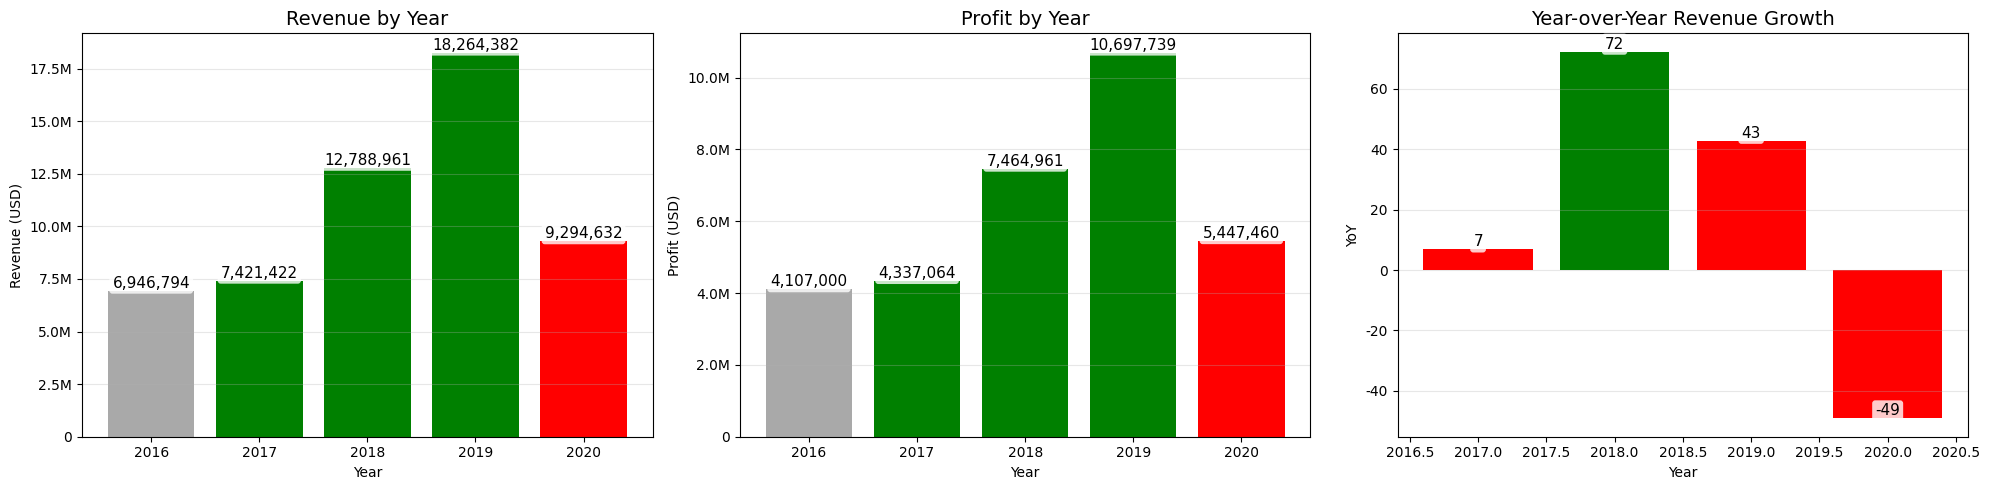

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

conditional_bar(
    x=yearly_df['year'],
    y=yearly_df['revenue'],
    title="Revenue by Year",
    xlabel="Year",
    ylabel="Revenue (USD)",
    ax=axes[0]
)

conditional_bar(
    x=yearly_df['year'],
    y=yearly_df['profit'],
    title="Profit by Year",
    xlabel="Year",
    ylabel="Profit (USD)",
    ax=axes[1]
)

conditional_bar(
    x=yearly_df['year'],
    y=yearly_df['revenue_yoy'],
    title="Year-over-Year Revenue Growth",
    xlabel="Year",
    ylabel="YoY",
    ax=axes[2],
)

> Insight:
  - 2016 to 2019 saw very aggressive growth. Revenue grew by an average of 38% per year while profit also followed suit with a growth of 37% per year. The peak came in 2019 when the company recorded revenue of $18.2 million and profit of $10.7 million. The consistency of high profit margins during this period proves that the foundation of the company's business model is very strong. But,
  - in 2020 revenue dropped 49% from $18.2M to $9.3M and profit also dropped 49% from $10.7M to $5.4M. However, the profit margin remained stable in the range of 50-58% which shows the consistency of the company's cost structure.

> Issues:
  - Is this the impact of the COVID-19 pandemic, or are there other internal factors?

In [ ]:
pre_pandemic = sales_df[(sales_df['year'] == 2020) & (sales_df['month_number'] <= 3)]
pandemic = sales_df[(sales_df['year'] == 2020) & (sales_df['month_number'] > 3)]

summary_pre = {
    'period': 'Pre-Pandemic',
    'revenue_usd': pre_pandemic['revenue_usd'].sum(),
    'orders': pre_pandemic['order_number'].count(),
    'unique_customers': pre_pandemic['customer_id'].nunique()
}

summary_pandemic = {
    'period': 'Pandemic',
    'revenue_usd': pandemic['revenue_usd'].sum(),
    'orders': pandemic['order_number'].count(),
    'unique_customers': pandemic['customer_id'].nunique()
}

comparison_df = pd.DataFrame([summary_pre, summary_pandemic])
comparison_df['avg_revenue_per_order'] = comparison_df['revenue_usd'] / comparison_df['orders']
comparison_df['avg_revenue_per_customer'] = comparison_df['revenue_usd'] / comparison_df['unique_customers']
comparison_df.map(commas)

,period,revenue_usd,orders,unique_customers,avg_revenue_per_order,avg_revenue_per_customer
0,Pre-Pandemic,"4,971,321.35","5,884","2,228",844.89,"2,231.29"
1,Pandemic,"4,323,310.79","5,142","1,974",840.78,"2,190.13"


In [ ]:
sales_df[sales_df['delivery_time']>0].describe()

,customer_id,birthday,age,order_number,line_item,order_date,delivery_date,delivery_time,year,month_number,quarter,quantity,unit_cost_usd,unit_price_usd,storekey,square_meters,open_date,exchange,revenue_usd,revenue_local,profit_usd,profit_local,frequency
count,12832.00,12832,12832.00,12832.00,12832.00,12832,12832,12832.00,12832.00,12832.00,12832.00,12832.00,12832.00,12832.00,12832.00,0.00,12832,12832.00,12832.00,12832.00,12832.00,12832.00,12832.00
mean,1174699.32,1968-09-17 22:01:29.775561096,51.95,1453758.21,2.15,2018-12-23 17:50:07.481297152,2018-12-28 06:57:34.114713344,4.55,2018.45,6.84,2.59,3.14,114.48,275.39,0.00,NaN,2010-01-01 00:00:00,1.00,866.47,868.72,506.96,508.19,3.01
min,301.00,1935-02-06 00:00:00,19.00,366001.00,1.00,2016-01-01 00:00:00,2016-01-06 00:00:00,1.00,2016.00,1.00,1.00,1.00,0.48,0.95,0.00,NaN,2010-01-01 00:00:00,0.67,0.95,0.73,0.47,0.36,1.00
25%,623892.00,1951-08-26 18:00:00,35.00,1158016.00,1.00,2018-03-03 00:00:00,2018-03-09 00:00:00,3.00,2018.00,3.00,1.00,1.00,21.92,46.99,0.00,NaN,2010-01-01 00:00:00,0.90,109.99,109.00,58.82,56.79,2.00
50%,1276598.00,1968-04-25 00:00:00,52.00,1513042.50,2.00,2019-02-21 00:00:00,2019-02-24 00:00:00,4.00,2019.00,7.00,3.00,2.00,77.95,179.99,0.00,NaN,2010-01-01 00:00:00,1.00,353.94,350.27,191.22,189.69,3.00
75%,1685055.00,1985-10-26 00:00:00,69.00,1793015.00,3.00,2019-11-28 00:00:00,2019-12-02 00:00:00,6.00,2019.00,10.00,4.00,4.00,137.96,299.99,0.00,NaN,2010-01-01 00:00:00,1.00,956.25,956.86,534.72,534.11,4.00
max,2098404.00,2002-01-03 00:00:00,86.00,2192016.00,7.00,2020-12-31 00:00:00,2021-01-03 00:00:00,17.00,2020.00,12.00,4.00,10.00,1060.22,3199.99,0.00,NaN,2010-01-01 00:00:00,1.59,28999.90,31744.80,19391.70,21227.09,13.00
std,596740.64,NaN,19.52,426244.34,1.36,NaN,NaN,2.13,1.19,3.78,1.19,2.25,139.11,377.39,0.00,NaN,NaN,0.16,1591.45,1635.74,1013.99,1038.56,1.72


> Insight:

In the 3 months of Pre-Pandemic, the company recorded revenue of $4.97 million, almost equivalent to $4.32 million during the 9 months of the pandemic. The number of orders and customers were also almost the same. This means that the performance during the first 3 months is equivalent to the following 9 months, confirming the significant impact of COVID-19 on the business slowdown.

> Issues
  - Which states have experienced the largest decrease in sales? What is the percentage decrease for each state?
  - Which categories are most affected? 


In [ ]:
pre_revenue_state = pre_pandemic.groupby('customer_state').agg({
    'revenue_usd': 'sum',
    'quantity': 'sum',
    'profit_usd': 'sum'
}).reset_index()

pandemic_revenue_state = pandemic.groupby('customer_state').agg({
    'revenue_usd': 'sum',
    'quantity': 'sum',
    'profit_usd': 'sum'
}).reset_index()

state_comparison = pd.merge(pre_revenue_state, pandemic_revenue_state,
                           on='customer_state', suffixes=('_pre', '_pandemic'))

state_comparison['revenue_change_pct'] = (
    (state_comparison['revenue_usd_pandemic'] - state_comparison['revenue_usd_pre']) /
    state_comparison['revenue_usd_pre'] * 100
).round(2)

state_comparison['profit_change_pct'] = (
    (state_comparison['profit_usd_pandemic'] - state_comparison['profit_usd_pre']) /
    state_comparison['profit_usd_pre'] * 100
).round(2)

declining_states = state_comparison[state_comparison['revenue_change_pct'] < 0].sort_values('revenue_change_pct')
declining_states[['customer_state','revenue_usd_pre', 'revenue_usd_pandemic', 'revenue_change_pct']].map(commas)

,customer_state,revenue_usd_pre,revenue_usd_pandemic,revenue_change_pct
136,North Hertfordshire,"4,027.60",51.38,-98.72
154,Powys,"6,617.90",199.00,-96.99
93,Leicester,"7,286.15",289.99,-96.02
75,Hampshire,"4,438.00",179.99,-95.94
41,Cheshire East,"11,468.28",474.26,-95.86
...,...,...,...,...
158,Queensland,"38,337.93","36,362.85",-5.15
204,Western Australia,"29,636.06","28,182.39",-4.91
29,British Columbia,"68,548.43","65,496.19",-4.45
199,Washington,"67,078.33","65,214.61",-2.78


In [ ]:
pre_revenue_cat = pre_pandemic.groupby('category').agg({
    'revenue_usd': 'sum',
    'quantity': 'sum',
    'profit_usd': 'sum'
}).reset_index()

pandemic_revenue_cat = pandemic.groupby('category').agg({
    'revenue_usd': 'sum',
    'quantity': 'sum',
    'profit_usd': 'sum'
}).reset_index()

category_comparison = pd.merge(pre_revenue_cat, pandemic_revenue_cat,
                              on='category', suffixes=('_pre', '_pandemic'))

category_comparison['revenue_change_pct'] = (
    (category_comparison['revenue_usd_pandemic'] - category_comparison['revenue_usd_pre']) /
    category_comparison['revenue_usd_pre'] * 100
).round(2)

declining_categories = category_comparison[category_comparison['revenue_change_pct'] < 0].sort_values('revenue_change_pct')
declining_categories[['category', 'revenue_usd_pre', 'revenue_usd_pandemic', 'revenue_change_pct']].map(commas)

,category,revenue_usd_pre,revenue_usd_pandemic,revenue_change_pct
0,Audio,"277,419.53","175,306.02",-36.81
5,Home Appliances,"628,882.45","478,419.11",-23.93
4,Games and Toys,"87,024.08","67,165.05",-22.82
1,Cameras and Camcorders,"660,116.09","549,105.95",-16.82
3,Computers,"1,946,638.59","1,718,484.13",-11.72
2,Cell Phones,"655,583.23","601,142.50",-8.30
6,"Music, Movies and Audio Books","286,870.79","279,608.61",-2.53


In [ ]:
total_states = pd.concat([sales_df[['customer_state']], pandemic[['customer_state']]]).nunique()['customer_state']
declining_state_count = len(declining_states)

summary_data = {
    'Metric': [
        'Total Pre-Pandemic Revenue (Jan-Mar 2020)',
        'Total Pandemic Revenue (Apr-Dec 2020)',
        'States with Decline',
        'Categories with Decline',
        'Worst Performing State',
        'Worst Performing Category',
    ],
    'Value': [
        f"${pre_pandemic['revenue_usd'].sum():,.0f}",
        f"${pandemic['revenue_usd'].sum():,.0f}",
        f"{declining_state_count} states from total {total_states} states",
        f"{len(declining_categories)} categories",
        f"{declining_states.iloc[0]['customer_state']} ({declining_states.iloc[0]['revenue_change_pct']:.1f}%)" if declining_state_count > 0 else "N/A",
        f"{declining_categories.iloc[0]['category']} ({declining_categories.iloc[0]['revenue_change_pct']:.1f}%)" if len(declining_categories) > 0 else "N/A",
    ]
}

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

                                   Metric                            Value
Total Pre-Pandemic Revenue (Jan-Mar 2020)                       $4,971,321
    Total Pandemic Revenue (Apr-Dec 2020)                       $4,323,311
                      States with Decline 116 states from total 491 states
                  Categories with Decline                     7 categories
                   Worst Performing State     North Hertfordshire (-98.7%)
                Worst Performing Category                   Audio (-36.8%)


### Quarterly Trends

In [ ]:
quarter_df = sales_df.groupby(['year','quarter']).agg({
    'revenue_usd': ['sum', 'mean'],
    'profit_usd': ['sum', 'mean', 'count'],
    'customer_id': 'nunique',
}).round(2).reset_index()

quarter_df.columns = ['year','quarter','revenue', 'avg_revenue', 'profit', 'avg_profit', 'order_count','unique_customers']
quarter_df['profit_margin'] = (quarter_df['profit'] / quarter_df['revenue'] * 100).round(2)
quarter_df.sort_values(['year', 'quarter']).map(commas).set_index(['year', 'quarter'])

revenue avg_revenue        profit avg_profit order_count  \
year  quarter                                                                  
2,016 1        1,879,424.44    1,067.85  1,123,498.70     638.35       1,760   
      2        1,225,163.09    1,040.92    716,551.00     608.79       1,177   
      3        1,569,893.64      955.50    927,138.89     564.30       1,643   
      4        2,272,312.39      977.34  1,339,811.88     576.26       2,325   
2,017 1        1,751,889.58      928.40  1,022,212.20     541.71       1,887   
      2        1,306,570.33    1,005.83    767,634.52     590.94       1,299   
      3        1,791,540.87      931.15  1,049,182.57     545.31       1,924   
      4        2,571,421.49      907.99  1,498,034.77     528.97       2,832   
2,018 1        2,696,369.20      974.83  1,580,406.55     571.37       2,766   
      2        2,117,868.43      889.11  1,234,528.50     518.27       2,382   
      3        3,172,760.33      879.12  1,844,485.58     511.08       3,609   
      4        4,801,962.70      884.18  2,805,540.48     516.58       5,431   
2,019 1        4,889,687.23      905.83  2,870,849.38     531.84       5,398   
      2        3,149,200.58      820.32  1,855,079.00     483.22       3,839   
      3        4,457,370.12      808.23  2,605,604.39     472.46       5,515   
      4        5,768,124.55      840.96  3,366,206.13     490.77       6,859   
2,020 1        4,971,321.35      844.89  2,916,773.38     495.71       5,884   
      2        1,859,551.96      852.61  1,085,483.45     497.70       2,181   
      3        1,309,883.78      869.78    769,767.90     511.13       1,506   
      4        1,153,875.05      793.04    675,435.42     464.22       1,455   

              unique_customers profit_margin  
year  quarter                                 
2,016 1                    710         59.78  
      2                    492         58.49  
      3                    680         59.06  
      4                    900         58.96  
2,017 1                    759         58.35  
      2                    540         58.75  
      3                    771         58.56  
      4                  1,118         58.26  
2,018 1                  1,096         58.61  
      2                    942         58.29  
      3                  1,417         58.14  
      4                  2,116         58.42  
2,019 1                  2,050         58.71  
      2                  1,551         58.91  
      3                  2,091         58.46  
      4                  2,589         58.36  
2,020 1                  2,228         58.67  
      2                    859         58.37  
      3                    616         58.77  
      4                    612         58.54

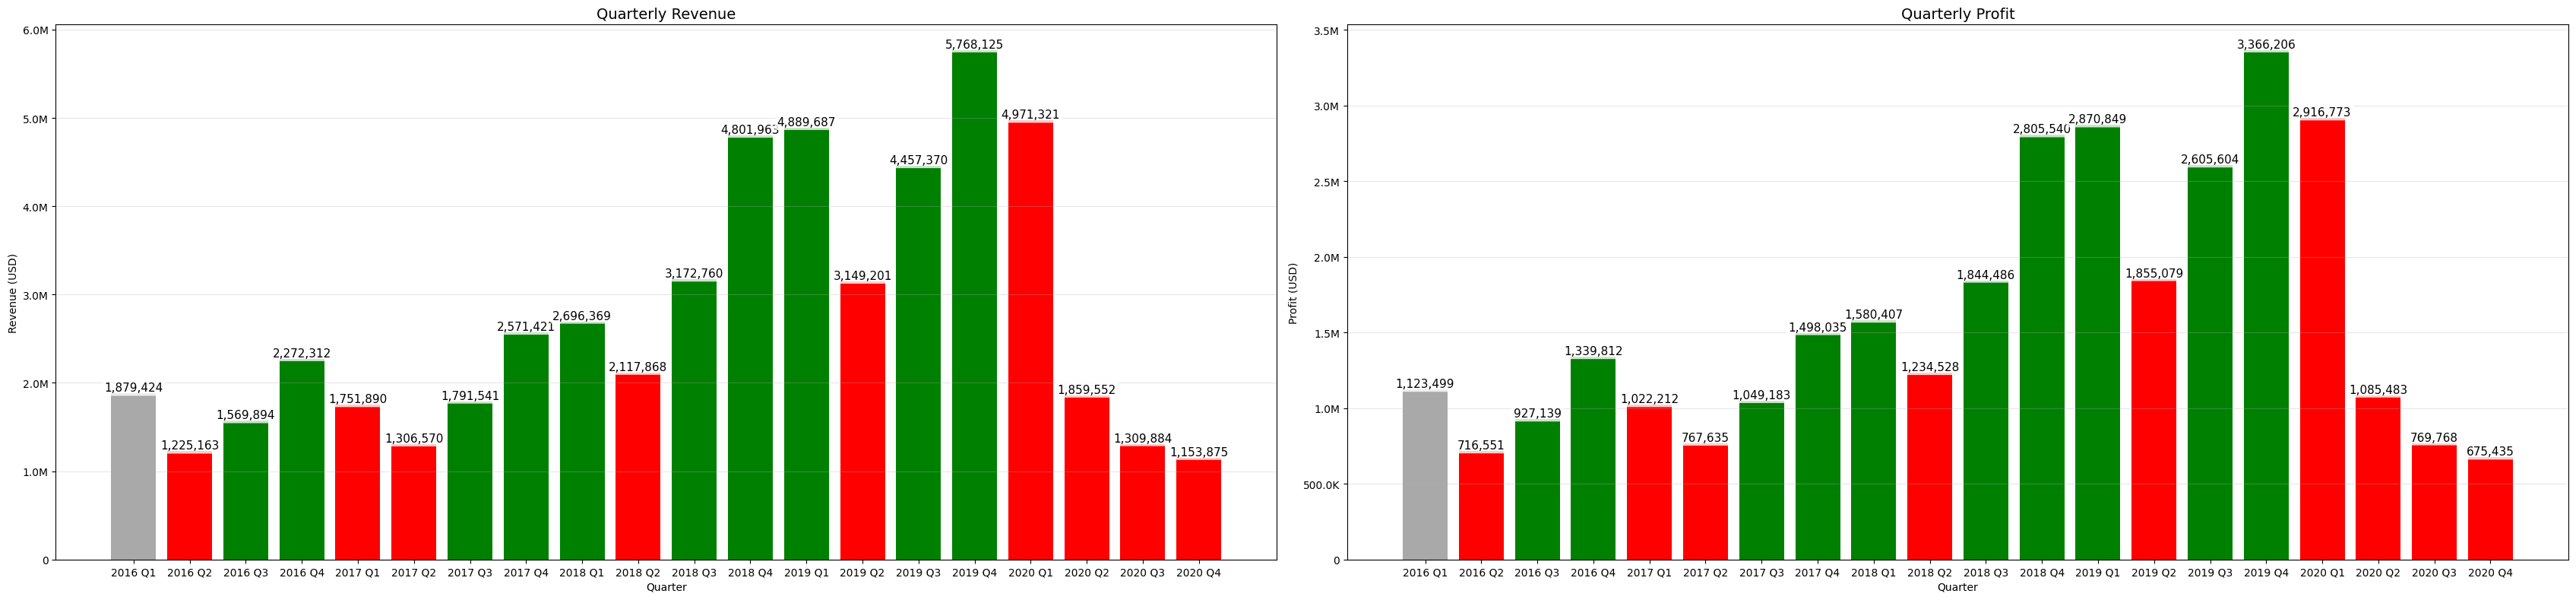

In [ ]:
quarter_df['label'] = quarter_df['year'].astype(str) + ' Q' + quarter_df['quarter'].astype(str)
fig, axes = plt.subplots(1, 2, figsize=(34, 8))

conditional_bar(
    x=quarter_df['label'],
    y=quarter_df['revenue'],
    title="Quarterly Revenue",
    xlabel="Quarter",
    ylabel="Revenue (USD)",
    ax=axes[0]
)

conditional_bar(
    x=quarter_df['label'],
    y=quarter_df['profit'],
    title="Quarterly Profit",
    xlabel="Quarter",
    ylabel="Profit (USD)",
    ax=axes[1]
)

### Monthly Trends

In [ ]:
monthly_df = sales_df.groupby(['year', 'month_number']).agg({
    'revenue_usd': ['sum', 'mean'],
    'profit_usd': ['sum', 'mean', 'count'],
    'customer_id': 'nunique',
}).round(2).reset_index()

monthly_df.columns = ['year','month_number','revenue', 'avg_revenue', 'profit', 'avg_profit', 'order_count','unique_customers']

monthly_df['profit_margin'] = (monthly_df['profit'] / monthly_df['revenue'] * 100).round(2)
monthly_df['revenue_pct'] = (monthly_df['revenue'] / monthly_df['revenue'].sum() * 100).round(2)
monthly_df['revenue_yoy'] = monthly_df['revenue'].pct_change() * 100
monthly_df['revenue_yoy'] = monthly_df['revenue_yoy'].round(2)

monthly_df.map(commas)

,year,month_number,revenue,avg_revenue,profit,avg_profit,order_count,unique_customers,profit_margin,revenue_pct,revenue_yoy
0,"2,016",1,"649,918.78",975.85,"388,268.96",582.99,666,289,59.74,1.19,NaN
1,"2,016",2,"891,098.30","1,093.37","531,722.75",652.42,815,327,59.67,1.63,37.11
2,"2,016",3,"338,407.36","1,212.93","203,506.99",729.42,279,109,60.14,0.62,-62.02
3,"2,016",4,"110,591.63","1,043.32","66,231.19",624.82,106,41,59.89,0.20,-67.32
4,"2,016",5,"595,986.18","1,189.59","356,049.32",710.68,501,219,59.74,1.09,438.91
5,"2,016",6,"518,585.28",909.80,"294,270.49",516.26,570,240,56.74,0.95,-12.99
6,"2,016",7,"454,959.83",888.59,"269,369.43",526.11,512,200,59.21,0.83,-12.27
7,"2,016",8,"547,512.69","1,040.90","325,909.91",619.60,526,226,59.53,1.00,20.34
8,"2,016",9,"567,421.12",937.89,"331,859.55",548.53,605,262,58.49,1.04,3.64
9,"2,016",10,"623,959.57",993.57,"365,597.98",582.16,628,256,58.59,1.14,9.96


In [ ]:
monthly_df[monthly_df['month_number']==4].describe()

,year,month_number,revenue,avg_revenue,profit,avg_profit,order_count,unique_customers,profit_margin,revenue_pct,revenue_yoy
count,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00
mean,2018.00,4.00,121466.81,952.90,71725.86,563.84,128.00,53.00,59.08,0.22,-76.69
std,1.58,0.00,64643.95,144.90,38010.69,92.07,63.35,23.38,0.86,0.12,8.37
min,2016.00,4.00,58580.07,743.45,35064.72,429.80,54.00,26.00,57.81,0.11,-83.76
25%,2017.00,4.00,70627.54,861.45,40831.40,508.46,95.00,41.00,58.83,0.13,-82.32
50%,2018.00,4.00,110591.63,1031.48,66231.19,606.78,106.00,43.00,59.02,0.20,-82.28
75%,2019.00,4.00,149892.71,1043.32,88472.45,624.82,174.00,75.00,59.86,0.27,-67.76
max,2020.00,4.00,217642.10,1084.82,128029.54,649.35,211.00,80.00,59.89,0.40,-67.32


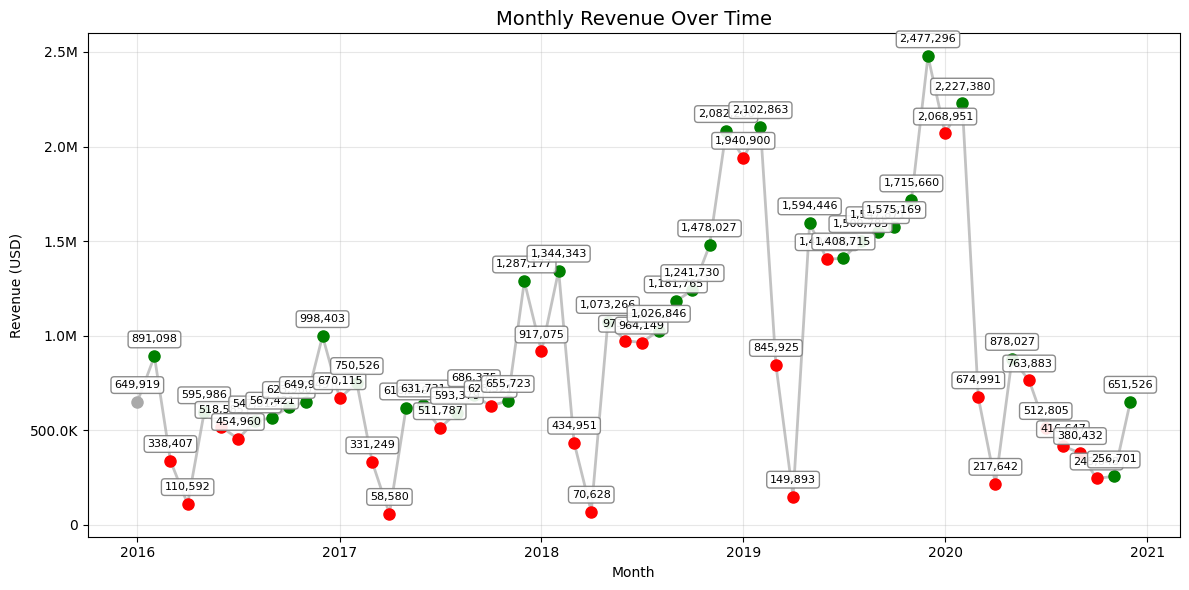

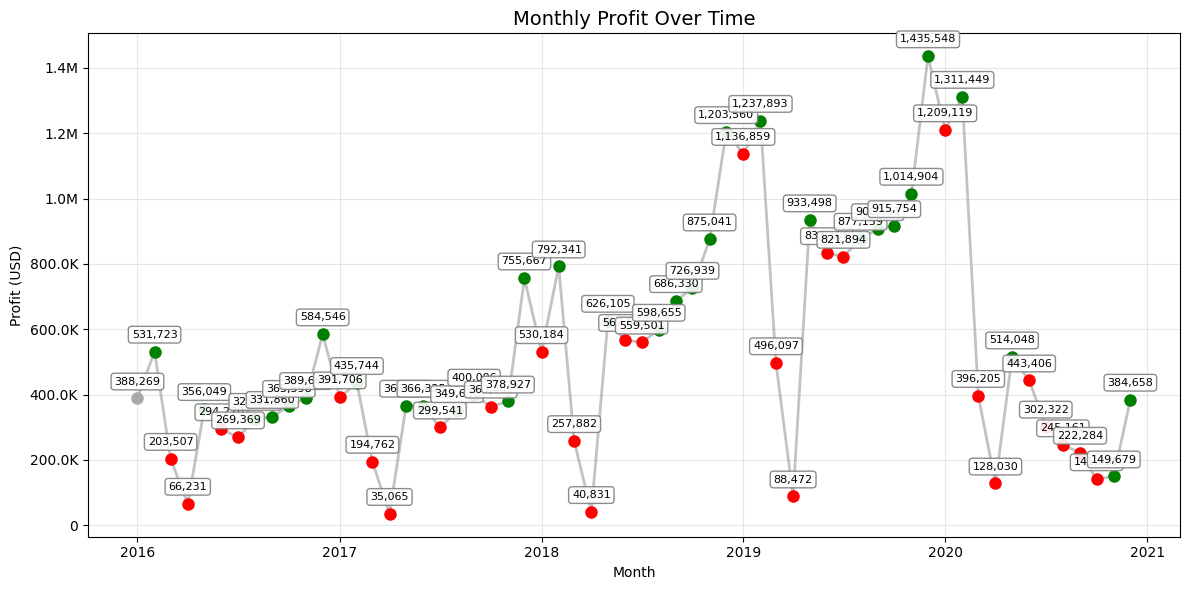

In [ ]:
month_chart = sales_df.groupby(['month']).agg({
    'revenue_usd': 'sum',
    'profit_usd': 'sum',
    }).round(2).reset_index().dropna()

line_chart(
    x=month_chart['month'].dt.to_timestamp(),
    y=month_chart['revenue_usd'],
    title='Monthly Revenue Over Time',
    xlabel='Month',
    ylabel='Revenue (USD)',
)

line_chart(
    x=month_chart['month'].dt.to_timestamp(),
    y=month_chart['profit_usd'],
    title='Monthly Profit Over Time',
    xlabel='Month',
    ylabel='Profit (USD)',
)

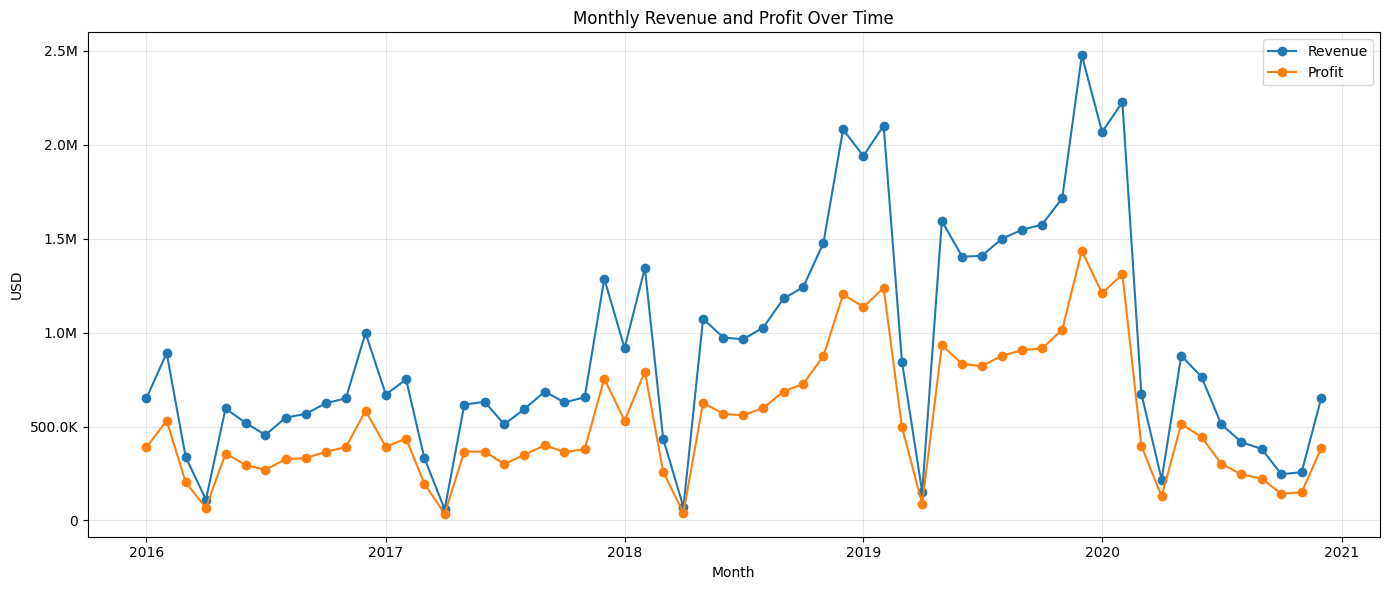

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(month_chart['month'].dt.to_timestamp(), month_chart['revenue_usd'], label='Revenue', marker='o')
plt.plot(month_chart['month'].dt.to_timestamp(), month_chart['profit_usd'], label='Profit', marker='o')
plt.title('Monthly Revenue and Profit Over Time')
plt.xlabel('Month')
plt.ylabel('USD')
plt.legend()
format_yaxis_comma()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Weekly Trends

In [ ]:
weekly_df = sales_df.groupby(['day_name']).agg({
        'revenue_usd': ['sum', 'mean'],
        'order_number': 'nunique',
    }).round(2)

weekly_df.columns = ['revenue', 'avg_revenue', 'order_count']

weekly_df.map(commas).sort_values(by='revenue', ascending=True)

,revenue,avg_revenue,order_count
day_name,,,
Thursday,"10,473,519.81",877.33,"4,989"
Saturday,"12,890,050.88",884.58,"6,127"
Monday,"5,649,258.36",879.54,"2,713"
Friday,"7,488,262.31",904.49,"3,462"
Tuesday,"7,593,994.86",898.27,"3,495"
Sunday,"893,671.47",808.02,449
Wednesday,"9,727,433.42",892.43,"4,593"


In [ ]:
sales_by_daytype = sales_df.groupby('day_type')['revenue_usd'].sum().reset_index()
sales_by_daytype.map(commas)

,day_type,revenue_usd
0,Weekday,"40,932,468.76"
1,Weekend,"13,783,722.35"


In [ ]:
sales_df['day_type'] = sales_df['day_type'].fillna('Weekday')
day_df = sales_df.groupby(['year', 'day_type']).agg({
    'revenue_usd': 'sum',
    'profit_usd': 'sum'
}).unstack()
day_df.columns = ['revenue_weekday', 'revenue_weekend', 'profit_weekday', 'profit_weekend']
day_df = day_df.reset_index()
day_df.map(commas)

,year,revenue_weekday,revenue_weekend,profit_weekday,profit_weekend
0,"2,016","5,161,584.74","1,785,208.82","3,052,589.96","1,054,410.51"
1,"2,017","5,477,783.99","1,943,638.28","3,206,477.00","1,130,587.06"
2,"2,018","9,560,687.87","3,228,272.79","5,576,875.87","1,888,085.24"
3,"2,019","13,723,509.42","4,540,873.06","8,039,302.66","2,658,436.24"
4,"2,020","7,008,902.74","2,285,729.40","4,111,109.36","1,336,350.79"


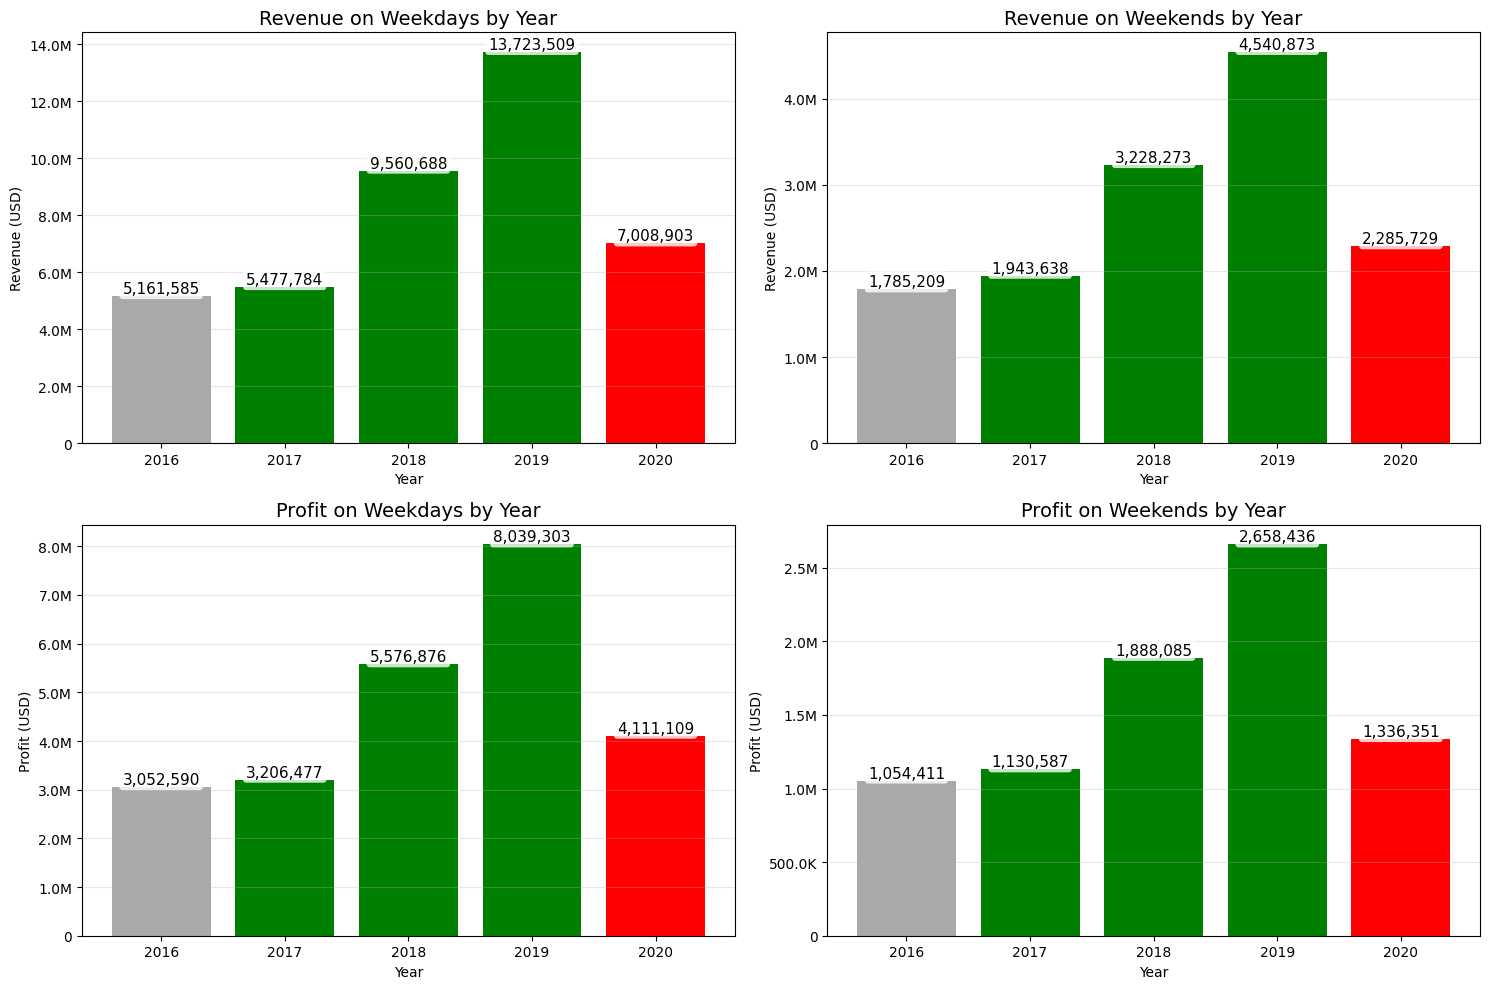

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

conditional_bar(
    x=day_df['year'],
    y=day_df['revenue_weekday'],
    title="Revenue on Weekdays by Year",
    xlabel="Year",
    ylabel="Revenue (USD)",
    ax=axes[0, 0]
)

conditional_bar(
    x=day_df['year'],
    y=day_df['revenue_weekend'],
    title="Revenue on Weekends by Year",
    xlabel="Year",
    ylabel="Revenue (USD)",
    ax=axes[0, 1]
)

conditional_bar(
    x=day_df['year'],
    y=day_df['profit_weekday'],
    title="Profit on Weekdays by Year",
    xlabel="Year",
    ylabel="Profit (USD)",
    ax=axes[1, 0]
)

conditional_bar(
    x=day_df['year'],
    y=day_df['profit_weekend'],
    title="Profit on Weekends by Year",
    xlabel="Year",
    ylabel="Profit (USD)",
    ax=axes[1, 1]
)

In [ ]:
sales_df.groupby('day_name')[['revenue_usd', 'profit_usd']].mean().sort_values(by='revenue_usd', ascending=False)

,revenue_usd,profit_usd
day_name,,
Friday,904.49,532.46
Tuesday,898.27,527.33
Wednesday,892.43,523.90
Saturday,884.58,517.93
Monday,879.54,512.71
Thursday,877.33,512.34
Sunday,808.02,470.71


## Operational Metrics

In [ ]:
sales_df['delivery_time'].mean()

np.float64(4.546836034912718)

In [ ]:
sales_df.groupby('day_name')['delivery_time'].mean().sort_values().reset_index()

,day_name,delivery_time
0,Tuesday,4.47
1,Monday,4.47
2,Thursday,4.51
3,Saturday,4.52
4,Wednesday,4.56
5,Friday,4.71
6,Sunday,4.85


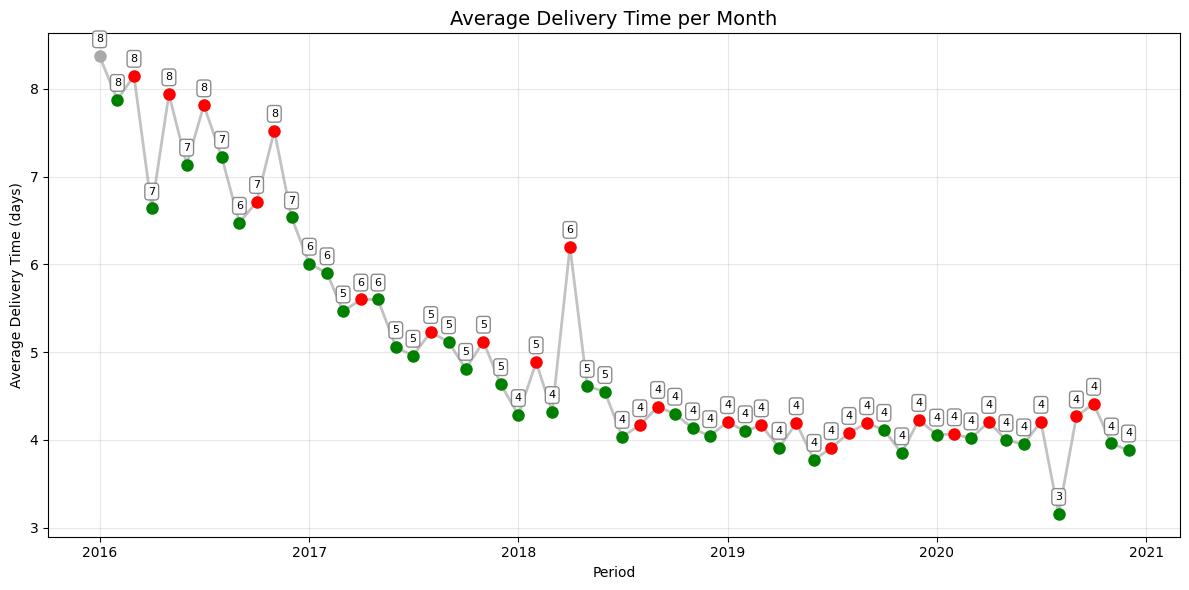

In [ ]:
delivery_monthly = sales_df.groupby('month')['delivery_time'].mean().reset_index()

line_chart(
  delivery_monthly['month'].dt.to_timestamp(),
  delivery_monthly['delivery_time'],
  'Average Delivery Time per Month',
  'Period',
  'Average Delivery Time (days)',
  up_color='red',
  down_color='green'
)

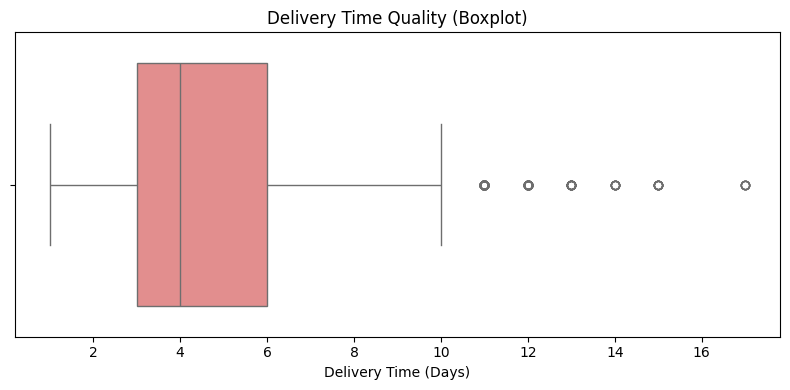

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=sales_df['delivery_time'], color='lightcoral')
plt.title('Delivery Time Quality (Boxplot)')
plt.xlabel('Delivery Time (Days)')
plt.tight_layout()
plt.show()

In [ ]:
delivery_time_trend = sales_df.groupby(['year', 'month_number'])['delivery_time'].mean().round(2)
delivery_time_trend.unstack()

month_number,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,8.37,7.87,8.15,6.64,7.94,7.14,7.81,7.23,6.47,6.71,7.52,6.53
2017,6.01,5.90,5.46,5.60,5.60,5.06,4.96,5.23,5.11,4.81,5.12,4.64
2018,4.28,4.89,4.32,6.20,4.62,4.55,4.04,4.17,4.38,4.30,4.13,4.04
2019,4.20,4.10,4.17,3.91,4.19,3.77,3.91,4.08,4.19,4.12,3.85,4.23
2020,4.06,4.07,4.02,4.21,4.00,3.95,4.21,3.16,4.27,4.41,3.96,3.88


In [ ]:
sales_df.groupby(['year' ,'customer_country', 'month_number'])['delivery_time'].mean().round(2).unstack()

month_number            1     2    3    4    5     6    7    8    9    10  \
year customer_country                                                       
2016 Australia         NaN  9.33  NaN  NaN 3.20  6.14  NaN 7.00 6.80 7.00   
     Canada           8.00  8.62  NaN  NaN 7.82 10.12 8.33 7.60 5.80 7.14   
     France           9.00  6.00  NaN  NaN 5.40  5.00 6.00 6.43 7.20 8.70   
     Germany          5.75  9.08  NaN  NaN 7.33  5.43 7.71  NaN 6.89 5.00   
     Italy            8.00  8.14  NaN  NaN 7.00  5.00 4.80 7.00 5.67 3.00   
     Netherlands       NaN  8.00  NaN  NaN  NaN  7.50 9.00 9.00 4.00 8.33   
     United Kingdom   6.94  6.58 9.36  NaN 7.25  6.64 6.96 7.80 6.31 7.89   
     United States    9.57  7.69 7.31 6.64 9.34  7.35 8.42 7.04 6.67 5.93   
2017 Australia        5.12  3.80 5.00  NaN 4.73  4.58 3.85 5.82 5.50 2.62   
     Canada           7.26  7.39 5.20  NaN 5.48  4.00 4.33 4.23 3.38 3.50   
     France           6.00   NaN 9.00  NaN 8.00  3.00 4.00 6.00  NaN 6.00   
     Germany          5.62  4.86  NaN 6.00 9.00  3.00 4.85 4.00 5.75 5.00   
     Italy            4.00  4.80  NaN  NaN 4.50  5.75 3.82 4.00  NaN 4.00   
     Netherlands      2.00  6.00 3.00  NaN 6.20   NaN  NaN 4.00 5.57  NaN   
     United Kingdom   7.00  6.25 7.00 4.00 5.73  5.85 4.00 4.56 5.39 4.47   
     United States    6.09  5.59 5.59 6.00 5.42  5.15 5.86 5.81 5.54 5.10   
2018 Australia        4.70 11.00 3.00  NaN 4.29  3.75 3.85 6.25 3.45 3.00   
     Canada           4.76  4.43 3.22 5.00 4.64  4.58 3.79 3.85 4.38 4.38   
     France           2.80   NaN 5.09  NaN 3.90  3.44 4.00  NaN 5.00 5.25   
     Germany          4.55  5.08 4.50 5.00 4.70  4.90 4.14 4.13 3.80 4.32   
     Italy            4.50  5.78  NaN 5.00 6.00  4.33 3.50 6.40 4.50 5.30   
     Netherlands      3.50  5.50  NaN  NaN 3.82  6.33 7.00 3.91 3.20 4.38   
     United Kingdom   4.84  4.30 2.50 3.00 4.68  4.52 3.68 3.29 5.27 4.29   
     United States    4.02  4.85 4.72 7.00 4.58  4.54 4.28 4.23 4.47 4.12   
2019 Australia        4.10  3.86 5.33 2.00 4.27  4.63 4.00 4.07 4.50 5.12   
     Canada           4.48  3.84 3.69 2.40 4.93  3.71 3.29 4.10 4.81 5.06   
     France           4.31  3.75 5.71  NaN 4.57  3.46 4.20 4.00 5.00 4.00   
     Germany          4.03  4.38 4.38 3.67 4.38  3.52 3.12 4.11 3.85 4.34   
     Italy            4.36  4.43 4.00 5.00 3.87  3.74 4.22 4.50 4.57 4.29   
     Netherlands      3.57  5.09 4.00 2.00 3.75  3.81 4.20 4.14 3.41 3.31   
     United Kingdom   4.18  4.35 4.23 4.29 5.05  4.27 3.90 3.75 4.44 3.49   
     United States    4.23  4.05 4.06 4.44 4.02  3.70 4.01 4.10 4.16 4.10   
2020 Australia        4.45  3.77 3.04 2.00 3.06  5.88 5.00 4.00 6.60 4.43   
     Canada           4.15  4.00 6.31 3.44 4.54  3.77 3.07 4.00 4.88 2.75   
     France           4.46  4.05 4.00 7.00 2.86  3.50 5.00 2.00  NaN 6.00   
     Germany          3.91  4.32 3.62 3.00 4.28  3.81 5.42 3.93 3.50 5.60   
     Italy            4.91  4.33 5.00 4.00 2.00  4.50 4.00  NaN 5.40  NaN   
     Netherlands      5.00  3.75 4.00 3.00 5.73  4.67 3.40  NaN 2.67 6.00   
     United Kingdom   4.00  4.05 4.06 3.00 4.68  3.22 3.65 2.75 4.87 3.00   
     United States    3.87  4.04 3.97 4.52 3.90  3.89 4.30 2.93 3.68 4.09   

month_number            11   12  
year customer_country            
2016 Australia        7.57 4.67  
     Canada           7.80 7.65  
     France            NaN 7.00  
     Germany           NaN 5.70  
     Italy            5.50 9.40  
     Netherlands       NaN 7.60  
     United Kingdom   8.11 5.86  
     United States    7.44 6.29  
2017 Australia        5.00 4.13  
     Canada           4.67 4.52  
     France            NaN 4.09  
     Germany          4.12 3.94  
     Italy            4.50 5.40  
     Netherlands      4.00 6.33  
     United Kingdom   5.38 4.50  
     United States    5.38 4.74  
2018 Australia        4.29 4.15  
     Canada           4.13 5.05  
     France           2.00 5.67  
     Germany          3.88 4.01  
     Italy       

## Customer Segmentation & RFM Analysis

### RFM Analysis Overview

In [ ]:
rfm = sales_df.groupby('customer_id').agg(
    recency=('order_date', lambda x: (last_date - x.max()).days),
    frequency=('order_number', 'nunique'),
    monetary=('revenue_usd', 'sum')
).reset_index()

rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']
rfm_score = rfm.copy()

rfm_score['Rscore'] = pd.cut(rfm_score['recency'],
                        bins=[0, 120, 210, 300, 390, float('inf')],
                        labels=[5, 4, 3, 2, 1],
                        right=False).astype(float)

rfm_score['Fscore'] = pd.cut(rfm_score['frequency'],
                        bins=[0, 2, 4, 6, 10, float('inf')],
                        labels=[1, 2, 3, 4, 5],
                        right=False).astype(float)

rfm_score['Mscore'] = pd.cut(rfm_score['monetary'],
                        bins=[0, 499, 1499, 2499, 5499, float('inf')],
                        labels=[1, 2, 3, 4, 5],
                        right=False).astype(float)

rfm_score['rfm_score'] = rfm_score[['Rscore','Fscore','Mscore']].sum(axis=1)

rfm_score['membership'] = pd.cut(rfm_score['rfm_score'],
                        bins=[0, 6, 9, 12, 15],
                        labels=['Bronze', 'Silver', 'Gold', 'Platinum'],
                        right=True)

rfm_score

,customer_id,recency,frequency,monetary,Rscore,Fscore,Mscore,rfm_score,membership
0,301,416,1,592.00,1.00,1.00,2.00,4.00,Bronze
1,325,362,3,5787.67,2.00,2.00,5.00,9.00,Silver
2,554,392,2,951.71,1.00,2.00,2.00,5.00,Bronze
3,1042,1031,1,1124.91,1.00,1.00,2.00,4.00,Bronze
4,1314,1108,1,2539.86,1.00,1.00,4.00,6.00,Bronze
...,...,...,...,...,...,...,...,...,...
11815,2099383,215,3,3739.00,3.00,2.00,4.00,9.00,Silver
11816,2099600,876,1,1270.84,1.00,1.00,2.00,4.00,Bronze
11817,2099758,204,2,529.91,4.00,2.00,2.00,8.00,Silver
11818,2099862,365,1,501.50,2.00,1.00,2.00,5.00,Bronze


In [ ]:
rfm_score['membership'].value_counts().reset_index()

,membership,count
0,Bronze,5187
1,Silver,4781
2,Gold,1599
3,Platinum,253


In [ ]:
sales_df = sales_df.merge(rfm_score[['customer_id', 'membership']], on='customer_id', how='left')
cols = sales_df.columns.tolist()
cols.insert(cols.index('customer_id') + 1, cols.pop(cols.index('membership')))
sales_df = sales_df[cols]

> Insight:
  
  The RFM (Recency, Frequency, Monetary) analysis on the sales_df dataset shows that the majority of your customer base falls into the Bronze and Silver categories, representing the segments with the lowest purchase frequency and monetary value. The distribution of customer priorities is as follows:
  - Bronze 5,193
  - Silver 4,808
  - Gold 1,552
  - Platinum 334

  This segmentation highlights that a significant portion of your customers has not yet delivered their full potential, either in engagement or value contribution.
> Recommendation:
  - Developed a comprehensive business intelligence system by creating executive dashboards with key RFM metrics and trends then developing segment performance reports with ROI analysis while setting up automated reporting for monthly RFM segment changes and creating data visualization for customer segment distribution.
  - Implemented RFM-based sales optimization strategy by prioritizing sales efforts based on customer priority and segment and developing segment-specific sales scripts and approach strategies while integrating lead scoring with RFM segments and training sales teams on the characteristics of each RFM segment.

### Customer Segments Definition

In [ ]:
buyer_segment = {
    r'111|112|121|131|141|151': 'Lost customers',
    r'332|322|233|232|223|222|132|123|122|212|211': 'Hibernating customers',
    r'155|154|144|214|215|115|114|113': 'Cannot Lose Them',
    r'255|254|245|244|253|252|243|242|235|234|225|224|153|152|145|143|142|135|134|133|125|124': 'At Risk',
    r'331|321|312|221|213|231|241|251': 'About To Sleep',
    r'535|534|443|434|343|334|325|324': 'Need Attention',
    r'525|524|523|522|521|515|514|513|425|424|413|414|415|315|314|313': 'Promising',
    r'512|511|422|421|412|411|311': 'New Customers',
    r'553|551|552|541|542|533|532|531|452|451|442|441|431|453|433|432|423|353|352|351|342|341|333|323': 'Potential Loyalist',
    r'543|444|435|355|354|345|344|335': 'Loyal',
    r'555|554|544|545|454|455|445': 'Champions'
}

- _Champions:_  
 These are your absolute best customers. They buy often, spend the most, and engage with your brand regularly. They respond well to special rewards, early access, and are ideal for testing new products or services. Keep delighting them!

- _Loyal:_  
These customers frequently shop and have spent significant amounts over time. They have a strong connection with your brand and are likely to recommend it to others. Rewarding their loyalty helps maintain this valuable relationship.

- _Potential Loyalist:_  
Customers in this segment have shown great potential by making repeated purchases. They need a bit more incentive to become fully loyal. Encourage them with rewards, engagement, and special offers.

- _New Customers:_  
These are first-time buyers with low purchase frequency so far. A great post-purchase experience and targeted offers can help convert them into loyal customers.

- _Promising:_  
Customers who show positive signs with good purchase frequency or recency, but haven’t spent as much yet. With the right nurture, they can become loyal or even champions.

- _Need Attention:_  
Customers that were active but their purchase activity is slowing down. Engaging and reactivating them with personalized offers is important to prevent losing them.

- _About To Sleep:_  
These buyers haven’t purchased in a while but were previously active. They are at risk of becoming inactive. Sending reminders or exclusive reactivation offers can wake their interest again.

- _At Risk:_  
These previously good customers haven’t bought recently—there's a risk of losing them to competitors. Personalized win-back campaigns are important for this group.

- _Cannot Lose Them:_  
High-value customers whose activity has dropped concerningly. They are essential to your business and must not be lost. Immediate attention and special incentives are needed to win them back.

- _Hibernating Customers:_  
Customers who haven’t purchased in a long time and show low engagement. They might have forgotten about your brand, so light-touch reminders or new product notifications could help.

- _Lost Customers:_  
Customers who used to buy but have long since stopped purchasing. They require substantial effort and appealing win-back offers to reactivate, if possible.

In [ ]:
campaign = rfm_score.copy()
campaign['rfm_string'] = campaign['Rscore'].astype(int).astype(str) + \
                        campaign['Fscore'].astype(int).astype(str) + \
                        campaign['Mscore'].astype(int).astype(str)

campaign['customer_segment'] = 'Undefined'
for pattern, segment in buyer_segment.items():
    mask = campaign['rfm_string'].str.contains(pattern, regex=True)
    campaign.loc[mask, 'customer_segment'] = segment

campaign['customer_segment'].value_counts().reset_index()

,customer_segment,count
0,At Risk,3920
1,Lost customers,2176
2,Cannot Lose Them,1755
3,Hibernating customers,1713
4,Promising,789
5,Need Attention,510
6,New Customers,294
7,Loyal,231
8,About To Sleep,210
9,Potential Loyalist,114


In [ ]:
sales_df = sales_df.merge(campaign[['customer_id', 'customer_segment']], on='customer_id', how='left')
cols = sales_df.columns.tolist()
cols.insert(cols.index('customer_id') + 2, cols.pop(cols.index('customer_segment')))
sales_df = sales_df[cols]

### Data RFM Membership

In [ ]:
data_customer = rfm_score[['customer_id', 'recency', 'frequency', 'monetary']]

customer_data = (sales_df.groupby('customer_id').agg({
    'name': 'first',
    'age': 'first',
    'membership': 'last',
    'customer_segment': 'first',
    'continent': 'first',
    'customer_country' : 'first',
    'customer_state': 'first',
    'customer_city': 'first',
    'state_code' : 'first',
    'order_date': 'max',
}).reset_index())

customer_datas = customer_data.merge(data_customer[['customer_id', 'recency', 'frequency', 'monetary']], on='customer_id', how='left')
customer_datas.sort_values(by='monetary', ascending=False).map(commas)

,customer_id,name,age,membership,customer_segment,continent,customer_country,customer_state,customer_city,state_code,order_date,recency,frequency,monetary
9320,"1,702,221",Matthew Flemming,84,Gold,At Risk,North America,United States,California,Anaheim,CA,2019-12-27,370,9,"61,871.70"
10457,"1,884,663",Karen Jones,50,Silver,At Risk,North America,United States,Louisiana,Lacassine,LA,2019-02-20,680,3,"43,517.80"
11013,"1,969,704",Zrina Topic,59,Gold,At Risk,North America,United States,Georgia,Lyerly,GA,2020-01-02,364,7,"42,788.04"
2722,"535,496",Stefanie Hartmann,38,Silver,At Risk,Europe,Germany,Freistaat Bayern,Geltendorf,BY,2018-11-24,768,3,"41,521.53"
2819,"551,036",Stephan Rothstein,67,Platinum,Need Attention,Europe,Germany,Schleswig-Holstein,Lütjenwestedt,SH,2020-12-25,6,4,"40,556.54"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3028,"587,974",Julia Wurfel,62,Bronze,New Customers,Europe,Germany,Freistaat Sachsen,Leipzig,SN,2020-04-24,251,1,3.35
722,"187,544",Ebony Fizelle,51,Bronze,Lost customers,Australia,Australia,New South Wales,Lost River,NSW,2018-12-29,733,1,3.35
8083,"1,505,785",Lee Elkins,29,Bronze,Hibernating customers,North America,United States,Colorado,Denver,CO,2020-02-26,309,1,3.35
6166,"1,203,443",Leland Glover,48,Bronze,Lost customers,North America,United States,Utah,Provo,UT,2018-01-26,"1,070",1,3.35


In [ ]:
segment_order = ['Lost customers', 'Hibernating customers', 'Cannot Lose Them', 'At Risk', 'About To Sleep', 'Need Attention', 'Promising', 'New Customers', 'Potential Loyalist', 'Loyal', 'Champions']

sales_df['customer_segment'] = pd.Categorical(
    sales_df['customer_segment'],
    categories=segment_order,
    ordered=True
)

segment_prior = sales_df.groupby(['customer_segment', 'membership']).agg({
    'revenue_usd': ['sum', 'mean'],
    'customer_id': 'nunique'
}).sort_index(level='customer_segment').reset_index().dropna()
segment_prior.columns = ['customer_segment','membership','revenue', 'avg_revenue', 'customers']
segment_prior.set_index(['customer_segment', 'membership']).map(commas)

revenue avg_revenue customers
customer_segment      membership                                     
Lost customers        Bronze       1,208,408.95      307.48     2,176
Hibernating customers Bronze       1,809,482.22      362.19     1,467
                      Silver         450,006.20      386.60       246
Cannot Lose Them      Bronze       3,602,246.33      936.87     1,251
                      Silver       3,923,848.06    1,949.25       503
                      Gold            27,443.91    1,193.21         1
At Risk               Silver      24,150,735.42    1,012.10     3,400
                      Gold         6,367,038.74      951.01       520
About To Sleep        Bronze         242,211.86      451.05       209
                      Silver             320.11       64.02         1
Need Attention        Silver         458,703.19      660.00       120
                      Gold         1,752,463.39      892.29       245
                      Platinum     1,696,794.42    1,036.53       145
Promising             Silver         573,820.28      810.48       205
                      Gold         3,674,477.48      987.76       584
New Customers         Bronze          15,543.54      146.64        84
                      Silver         155,348.86      298.17       210
Potential Loyalist    Silver         189,768.97      369.20        96
                      Gold            36,137.75      317.00        18
Loyal                 Gold         2,713,745.43      971.28       231
Champions             Platinum     1,667,646.00      911.78       108

> Insights:
  - The campaign uses an 11-level prioritization system with critical segments (At Risk, Lost customers) prioritized 1-2, ensuring resources are focused on customers most in need of intervention to prevent further churn.
  - The highest discount structure (25%) is given to Lost customers Bronze, dropping gradually to 5% for Champions, demonstrating strategic budget allocation according to the urgency level of retention.
  - The campaign integrates customer segments and priority tiers (Bronze/Silver/Gold/Platinum) to create 32+ offer variations tailored to the value and status of each customer.

In [ ]:
# customer_datas.to_csv(r"D:\Documents\VScode\Data Analyst\Data Analyst\Proyek Real\Maven - Global Electronics Retailer\dataset\customer_segement.csv", index=False)

## Campaign Strategy

### Segmentation

In [ ]:
segment_priority_messages = {
    'At Risk': {
        'Bronze': {'priority': 1, 'campaign_discount': 18, 'offer': 'Bronze Care 18% Off + Free Consultation + Payment Extension'},
        'Silver': {'priority': 1, 'campaign_discount': 15, 'offer': 'Silver Plus 15% Off + Priority Support + Extended Terms'},
        'Gold': {'priority': 1, 'campaign_discount': 12, 'offer': 'Gold VIP 12% Off + Premium Consultation + Fast Track'}
    },
    'Lost customers': {
        'Bronze': {'priority': 2, 'campaign_discount': 20, 'offer': 'Bronze Comeback 20% Off + $15 Credit + Free Support'},
        'default': {'priority': 2, 'campaign_discount': 17, 'offer': 'Welcome Back 17% Off + $12.5 Store Credit + Priority Support'}
    },
    'Hibernating customers': {
        'Bronze': {'priority': 3, 'campaign_discount': 15, 'offer': 'Bronze Wake-Up 15% Off + New Alerts + Free Shipping'},
        'Silver': {'priority': 3, 'campaign_discount': 12, 'offer': 'Silver Revival 12% Off + Product Discovery + Premium Ship'},
        'default': {'priority': 3, 'campaign_discount': 10, 'offer': 'Reactivation 10% Off + Alerts + Standard Ship'}
    },
    'Cannot Lose Them': {
        'Bronze': {'priority': 4, 'campaign_discount': 12, 'offer': 'Bronze Retain 12% Off + Account Review + Support Access'},
        'Silver': {'priority': 4, 'campaign_discount': 10, 'offer': 'Silver VIP 10% Off + Personal Review + Priority Queue'},
        'Gold': {'priority': 4, 'campaign_discount': 8, 'offer': 'Gold Elite 8% Off + Executive Review + VIP Access'},
        'default': {'priority': 4, 'campaign_discount': 10, 'offer': 'VIP Care 10% Off + Account Review + Priority Access'}
    },
    'Promising': {
        'Silver': {'priority': 5, 'campaign_discount': 16, 'offer': 'Silver Growth 16% Off + Education + Fast-Track Loyalty'},
        'Gold': {'priority': 5, 'campaign_discount': 12, 'offer': 'Gold Potential 12% Off + Premium Resources + VIP Track'},
        'default': {'priority': 5, 'campaign_discount': 14, 'offer': 'Growth Bonus 14% Off + Educational Resources + Loyalty Fast-Track'}
    },
    'About To Sleep': {
        'Bronze': {'priority': 6, 'campaign_discount': 15, 'offer': 'Bronze Alert 15% Off + Engagement Rewards + Reminder Service'},
        'default': {'priority': 6, 'campaign_discount': 13, 'offer': 'Stay Connected 13% Off + Engagement Rewards + Reminder Service'}
    },
    'Need Attention': {
        'Silver': {'priority': 7, 'campaign_discount': 14, 'offer': 'Silver Care 14% Off + Direct Support + Custom Solutions'},
        'Gold': {'priority': 7, 'campaign_discount': 10, 'offer': 'Gold Premium 10% Off + Executive Support + Priority Solutions'},
        'Platinum': {'priority': 7, 'campaign_discount': 8, 'offer': 'Platinum Elite 8% Off + C-Level Support + Exclusive Solutions'},
        'default': {'priority': 7, 'campaign_discount': 12, 'offer': 'Personal Care 12% Off + Direct Support + Custom Solutions'}
    },
    'New Customers': {
        'Bronze': {'priority': 8, 'campaign_discount': 12, 'offer': 'Bronze Welcome 12% Off + Starter Guide + Bonus Points'},
        'Silver': {'priority': 8, 'campaign_discount': 10, 'offer': 'Silver Start 10% Off + Premium Guide + Welcome Kit'},
        'default': {'priority': 8, 'campaign_discount': 10, 'offer': 'Welcome 10% Off + Getting Started Guide + First Purchase Bonus'}
    },
    'Potential Loyalist': {
        'Silver': {'priority': 9, 'campaign_discount': 10, 'offer': 'Silver Step 10% Off + Loyalty Invite + Double Points'},
        'Gold': {'priority': 9, 'campaign_discount': 8, 'offer': 'Gold Track 8% Off + VIP Loyalty + Triple Points'},
        'default': {'priority': 9, 'campaign_discount': 8, 'offer': 'Next Step 8% Off + Loyalty Program Invite + Bonus Points'}
    },
    'Loyal': {
        'Gold': {'priority': 10, 'campaign_discount': 8, 'offer': 'Gold Loyalty 8% Off + Exclusive Updates + Premium Gift'},
        'Platinum': {'priority': 10, 'campaign_discount': 6, 'offer': 'Platinum Thanks 6% Off + VIP Updates + Executive Gift'},
        'default': {'priority': 10, 'campaign_discount': 8, 'offer': 'Thank You 8% Off + Exclusive Updates + Anniversary Gift'}
    },
    'Champions': {
        'Platinum': {'priority': 11, 'campaign_discount': 5, 'offer': 'Platinum Elite 5% Off + VIP Events + Exclusive Access'},
        'default': {'priority': 11, 'campaign_discount': 5, 'offer': 'Elite Status 5% Off + VIP Events + Exclusive Access'}
    }
}

segment_order = ['Lost customers', 'Hibernating customers', 'Cannot Lose Them',
                'At Risk', 'About To Sleep', 'Need Attention', 'Promising',
                'New Customers', 'Potential Loyalist', 'Loyal', 'Champions']

def get_segment_message(segment, priority_level):
    segment_data = segment_priority_messages.get(segment, {})
    return segment_data.get(priority_level, segment_data.get('default', {
        'priority': 12,
        'campaign_discount': 5,
        'offer': 'Standard 5% Off + Newsletter + Basic Support'
    }))

campaign['message_data'] = campaign.apply(
    lambda row: get_segment_message(row['customer_segment'], row['membership']),
    axis=1
)

campaign['campaign_priority'] = campaign['message_data'].apply(lambda x: x['priority'])
campaign['offer'] = campaign['message_data'].apply(lambda x: x['offer'])
campaign['campaign_discount'] = campaign['message_data'].apply(lambda x: x['campaign_discount'])

campaign = campaign[['customer_id', 'monetary', 'customer_segment', 'membership',
                    'campaign_priority', 'offer', 'campaign_discount']]
campaign

,customer_id,monetary,customer_segment,membership,campaign_priority,offer,campaign_discount
0,301,592.00,Lost customers,Bronze,2,Bronze Comeback 20% Off + $15 Credit + Free Su...,20
1,325,5787.67,At Risk,Silver,1,Silver Plus 15% Off + Priority Support + Exten...,15
2,554,951.71,Hibernating customers,Bronze,3,Bronze Wake-Up 15% Off + New Alerts + Free Shi...,15
3,1042,1124.91,Lost customers,Bronze,2,Bronze Comeback 20% Off + $15 Credit + Free Su...,20
4,1314,2539.86,Cannot Lose Them,Bronze,4,Bronze Retain 12% Off + Account Review + Suppo...,12
...,...,...,...,...,...,...,...
11815,2099383,3739.00,Need Attention,Silver,7,Silver Care 14% Off + Direct Support + Custom ...,14
11816,2099600,1270.84,Lost customers,Bronze,2,Bronze Comeback 20% Off + $15 Credit + Free Su...,20
11817,2099758,529.91,New Customers,Silver,8,Silver Start 10% Off + Premium Guide + Welcome...,10
11818,2099862,501.50,Hibernating customers,Bronze,3,Bronze Wake-Up 15% Off + New Alerts + Free Shi...,15


In [ ]:
sales_df = sales_df.merge(campaign[['customer_id', 'campaign_discount']], on='customer_id', how='left')
cols = sales_df.columns.tolist()
cols.insert(cols.index('customer_id') + 3, cols.pop(cols.index('campaign_discount')))
sales_df = sales_df[cols]

### Targeted Strategy

In [ ]:
customer_info = sales_df.groupby('customer_id').agg({
    'name': 'first',
    'customer_country': 'first',
    'customer_state': 'first',
    'customer_city': 'first',
    'age': 'first',
    'gender': 'first',
}).reset_index()

marketing_data = campaign.merge(customer_info, on='customer_id', how='left')
marketing_data = marketing_data.sort_values(['campaign_priority', 'monetary'], ascending=[True, False])

marketing_data=marketing_data[['customer_id', 'name','age','gender','monetary','customer_country','customer_state','customer_city', 'customer_segment','campaign_priority','offer','campaign_discount']]
marketing_data.sample(3)

,customer_id,name,age,gender,monetary,customer_country,customer_state,customer_city,customer_segment,campaign_priority,offer,campaign_discount
710,184327,Gemma Lampungmeiua,19,Female,24.97,Australia,Queensland,Rural View,Lost customers,2,Bronze Comeback 20% Off + $15 Credit + Free Su...,20
537,141338,Benjamin Poupinel,83,Male,2870.50,Australia,New South Wales,Nundle,Cannot Lose Them,4,Bronze Retain 12% Off + Account Review + Suppo...,12
4439,874079,Ihab Luiting,35,Male,25704.80,Netherlands,Noord-Holland,Uithoorn,Need Attention,7,Gold Premium 10% Off + Executive Support + Pri...,10


In [ ]:
geographic_campaign = marketing_data.groupby(['customer_country', 'customer_segment']).agg({
    'customer_id': 'nunique',
    'monetary': 'sum',
    'campaign_discount': 'mean'
}).round(2)
geographic_campaign.dropna()

customer_id   monetary  \
customer_country customer_segment                                
Australia        About To Sleep                  14   18864.10   
                 At Risk                        166 1197778.68   
                 Cannot Lose Them               176  794805.35   
                 Hibernating customers          103  108446.26   
                 Lost customers                 216  124014.96   
...                                             ...        ...   
United States    Loyal                          160 1825293.53   
                 Need Attention                 314 2340777.20   
                 New Customers                  129   77966.73   
                 Potential Loyalist              65  131181.45   
                 Promising                      417 2344698.09   

                                        campaign_discount  
customer_country customer_segment                          
Australia        About To Sleep                     15.00  
                 At Risk                            14.96  
                 Cannot Lose Them                   11.39  
                 Hibernating customers              14.85  
                 Lost customers                     20.00  
...                                                   ...  
United States    Loyal                               8.00  
                 Need Attention                     10.25  
                 New Customers                      10.43  
                 Potential Loyalist                  9.69  
                 Promising                          12.83  

[86 rows x 3 columns]

### ROI Analysis

In [ ]:
segment_conversion_rates = {
    'Champions': 0.25,           # highly engaged
    'Loyal': 0.22,              # strong relationship
    'Potential Loyalist': 0.18, # good potential
    'Cannot Lose Them': 0.20,   # VIP response
    'Need Attention': 0.15,     # moderate engagement
    'Promising': 0.16,          # growth potential
    'New Customers': 0.10,      # still building trust
    'About To Sleep': 0.10,     # low engagement
    'At Risk': 0.08,            # difficult to convert
    'Hibernating customers': 0.06, # very low engagement
    'Lost customers': 0.04      # hardest to re-engage
}

membership_multipliers = {
    'Platinum': 1.3,
    'Gold': 1.15,
    'Silver': 1.0,
    'Bronze': 0.85,
    'default': 0.9
}

campaign_costs = {
    'Lost customers': 25,     # High because it takes a lot of effort to re-engage
    'At Risk': 45,            # Priority 1, need high investment
    'Hibernating customers': 25,
    'Cannot Lose Them': 50,   # VIP customers, worth high investment
    'Promising': 30,          # Good growth potential
    'About To Sleep': 25,
    'Need Attention': 30,
    'New Customers': 20,      # Low cost for nurturing
    'Potential Loyalist': 25,
    'Loyal': 15,              # Low maintenance cost
    'Champions': 10           # Minimal investment, already loyal
}

discount_data = {
    'At Risk': {'Bronze': 18, 'Silver': 15, 'Gold': 12},
    'Lost customers': {'Bronze': 20, 'default': 17},
    'Hibernating customers': {'Bronze': 15, 'Silver': 12, 'default': 10},
    'Cannot Lose Them': {'Bronze': 12, 'Silver': 10, 'Gold': 8, 'default': 10},
    'Promising': {'Silver': 16, 'Gold': 12, 'default': 14},
    'About To Sleep': {'Bronze': 15, 'default': 13},
    'Need Attention': {'Silver': 14, 'Gold': 10, 'Platinum': 8, 'default': 12},
    'New Customers': {'Bronze': 12, 'Silver': 10, 'default': 10},
    'Potential Loyalist': {'Silver': 10, 'Gold': 8, 'default': 8},
    'Loyal': {'Gold': 8, 'Platinum': 6, 'default': 8},
    'Champions': {'Platinum': 5, 'default': 5}
}

def calculate_dynamic_conversion_rate(segment, membership):
    base_rate = segment_conversion_rates.get(segment, 0.15)
    multiplier = membership_multipliers.get(membership, 0.9)
    return min(base_rate * multiplier, 0.35)

def calculate_campaign_roi_from_df(row):
    segment = row['customer_segment']
    membership = row['membership']
    customers = row['customers']
    avg_revenue = row['avg_revenue']

    conversion_rate = calculate_dynamic_conversion_rate(segment, membership)

    campaign_cost_per_customer = campaign_costs.get(segment, 30)
    discount_rate = discount_data.get(segment, {}).get(membership,
                   discount_data.get(segment, {}).get('default', 10))

    converted_customers = customers * conversion_rate
    discounted_revenue = avg_revenue * (1 - discount_rate / 100)
    total_campaign_revenue = converted_customers * discounted_revenue
    total_campaign_cost = customers * campaign_cost_per_customer
    total_discount_cost = converted_customers * avg_revenue * (discount_rate / 100)
    total_cost = total_campaign_cost + total_discount_cost
    net_profit = total_campaign_revenue - total_cost
    roi_percentage = (net_profit / total_cost * 100) if total_cost > 0 else 0

    return pd.Series({
        'segment': segment,
        'membership': membership,
        'customers': customers,
        'conversion_rate': round(conversion_rate, 3),
        'converted_customers': round(converted_customers),
        'avg_revenue': round(avg_revenue, 2),
        'discount_rate': discount_rate,
        'campaign_cost_per_customer': campaign_cost_per_customer,
        'total_campaign_revenue': round(total_campaign_revenue, 2),
        'total_campaign_cost': round(total_campaign_cost, 2),
        'total_discount_cost': round(total_discount_cost, 2),
        'total_cost': round(total_cost, 2),
        'net_profit': round(net_profit, 2),
        'roi_percentage': round(roi_percentage, 2)
    })

roi_df = segment_prior.apply(calculate_campaign_roi_from_df, axis=1)
roi_df = roi_df.sort_values('roi_percentage', ascending=False)
roi_df.set_index(['segment', 'membership']).map(commas)

customers conversion_rate  \
segment               membership                             
Champions             Platinum         108            0.33   
Loyal                 Gold             231            0.25   
Need Attention        Platinum         145            0.20   
Cannot Lose Them      Silver           503            0.20   
                      Gold               1            0.23   
Promising             Gold             584            0.18   
Need Attention        Gold             245            0.17   
Promising             Silver           205            0.16   
Cannot Lose Them      Bronze         1,251            0.17   
Potential Loyalist    Gold              18            0.21   
Need Attention        Silver           120            0.15   
Potential Loyalist    Silver            96            0.18   
At Risk               Gold             520            0.09   
                      Silver         3,400            0.08   
New Customers         Silver           210            0.10   
About To Sleep        Bronze           209            0.09   
Hibernating customers Silver           246            0.06   
                      Bronze         1,467            0.05   
New Customers         Bronze            84            0.09   
Lost customers        Bronze         2,176            0.03   
About To Sleep        Silver             1            0.10   

                                 converted_customers avg_revenue  \
segment               membership                                   
Champions             Platinum                    35      911.78   
Loyal                 Gold                        58      971.28   
Need Attention        Platinum                    28    1,036.53   
Cannot Lose Them      Silver                     101    1,949.25   
                      Gold                         0    1,193.21   
Promising             Gold                       107      987.76   
Need Attention        Gold                        42      892.29   
Promising             Silver                      33      810.48   
Cannot Lose Them      Bronze                     213      936.87   
Potential Loyalist    Gold                         4      317.00   
Need Attention        Silver                      18      660.00   
Potential Loyalist    Silver                      17      369.20   
At Risk               Gold                        48      951.01   
                      Silver                     272    1,012.10   
New Customers         Silver                      21      298.17   
About To Sleep        Bronze                      18      451.05   
Hibernating customers Silver                      15      386.60   
                      Bronze                      75      362.19   
New Customers         Bronze                       7      146.64   
Lost customers        Bronze                      74      307.48   
About To Sleep        Silver                       0       64.02   

                                 discount_rate campaign_cost_per_customer  \
segment               membership                                            
Champions             Platinum               5                         10   
Loyal                 Gold                   8                         15   
Need Attention        Platinum               8                         30   
Cannot Lose Them      Silver                10                         50   
                      Gold                   8                         50   
Promising             Gold                  12                         30   
Need Attention        Gold                  10                         30   
Promising             Silver                16                         30   
Cannot Lose Them      Bronze                12                         50   
Potential Loyalist    Gold                   8                         25   
Need Attention        Silver                14                         30   
Potential Loyalist    Silver            

In [ ]:
segment_roi_summary = roi_df.groupby('segment').agg({
    'customers': 'sum',
    'converted_customers': 'sum',
    'total_campaign_revenue': 'sum',
    'total_cost': 'sum',
    'net_profit': 'sum'
}).round(2)
segment_roi_summary['overall_roi'] = ((segment_roi_summary['net_profit'] / segment_roi_summary['total_cost']) * 100).round(2)
segment_roi_summary = segment_roi_summary.reindex(segment_order)
segment_roi_summary.map(commas)

,customers,converted_customers,total_campaign_revenue,total_cost,net_profit,overall_roi
segment,,,,,,
Lost customers,"2,176",74,"18,199.07","58,949.77","-40,750.70",-69.13
Hibernating customers,"1,713",90,"28,054.54","47,574.40","-19,519.86",-41.03
Cannot Lose Them,"1,755",314,"352,071.86","131,290.62","220,781.24",168.16
At Risk,"3,920",320,"274,034.50","223,153.27","50,881.23",22.80
About To Sleep,210,18,"6,816.48","6,452.76",363.73,5.64
Need Attention,510,88,"71,119.52","23,078.88","48,040.64",208.16
Promising,789,140,"115,734.47","40,660.32","75,074.15",184.64
New Customers,294,28,"6,556.85","6,631.81",-74.96,-1.13
Potential Loyalist,114,21,"6,828.44","3,582.47","3,245.98",90.61


In [ ]:
cost_analysis = roi_df.groupby('campaign_cost_per_customer').agg({
    'roi_percentage': 'mean',
    'customers': 'sum',
    'net_profit': 'sum'
}).round(2).sort_values('roi_percentage', ascending=False)
cost_analysis.map(commas)

,roi_percentage,customers,net_profit
campaign_cost_per_customer,,,
10,"1,034.38",108,"27,723.14"
15,552.29,231,"44,217.00"
50,215.99,"1,755","220,781.24"
30,185.08,"1,299","123,114.79"
45,29.58,"3,920","50,881.23"
25,-3.29,"4,213","-56,660.85"
20,-16.10,294,-74.96


In [ ]:
priority_mapping = {segment: idx+1 for idx, segment in enumerate(segment_order)}
roi_df['priority'] = roi_df['segment'].map(priority_mapping)

priority_analysis = roi_df.groupby('priority').agg({
    'segment': 'first',
    'customers': 'sum',
    'net_profit': 'sum',
    'total_cost': 'sum',
    'roi_percentage': 'mean'
}).round(2)

priority_analysis['calculated_roi'] = ((priority_analysis['net_profit'] / priority_analysis['total_cost']) * 100).round(2)
priority_analysis.map(commas)

,segment,customers,net_profit,total_cost,roi_percentage,calculated_roi
priority,,,,,,
1,Lost customers,"2,176","-40,750.70","58,949.77",-69.13,-69.13
2,Hibernating customers,"1,713","-19,519.86","47,574.40",-35.00,-41.03
3,Cannot Lose Them,"1,755","220,781.24","131,290.62",215.99,168.16
4,At Risk,"3,920","50,881.23","223,153.27",29.58,22.80
5,About To Sleep,210,363.73,"6,452.76",-36.24,5.64
6,Need Attention,510,"48,040.64","23,078.88",200.69,208.16
7,Promising,789,"75,074.15","40,660.32",161.67,184.64
8,New Customers,294,-74.96,"6,631.81",-16.10,-1.13
9,Potential Loyalist,114,"3,245.98","3,582.47",94.28,90.61


> Insight:
  - Champions achieved the highest ROI of 1,010.21%, while the Lost customer segment experienced a negative ROI of -67.61%.
  - Platinum customers showed consistently better ROI performance compared to other membership levels. Champions with Platinum membership generated an ROI of 1,010.21%, while Loyal with Gold membership only achieved 555.44%. This shows that investment in premium customers provides a more optimal return.
  - Segments with low campaign cost per customer (10-15) such as Champions and Loyal show high ROI, while segments with high cost (45-50) such as Cannot Lose Them and At Risk generate lower ROI although still positive.

> Issue:
  - Many segments have low conversion rates, with lost customers only reaching 0.03% and hibernating customers 0.05-0.06%. This suggests that the message or timing of the campaign may not be right for these segments.

> Recommendation:
  - Set an ROI target of at least 50% to continue the campaign on specific segments.
  - Create a customized strategy to encourage Gold and Silver members to upgrade to Platinum level.
  - ROI of -67% indicates current strategy is not effective, consider alternative channels that are more cost-effective or pause.
  - Adjust campaign costs based on historical ROI and membership levels

## GEOLOCATION

In [ ]:
address = sales_df[['customer_id','name' ,'continent', 'customer_country', 'customer_state', 'state_code', 'customer_city', 'zip_code']]
address = address.drop_duplicates(subset='customer_id')

In [ ]:
address['customer_state'].nunique()

491

In [ ]:
# customer_div_state = address['customer_state'].drop_duplicates()
# customer_div_state.to_csv(r"D:\Documents\VScode\Data Analyst\Data Analyst\Proyek Real\Maven - Global Electronics Retailer\dataset\region_data.csv", index=False)